# Machine Learning Project
### Designing algorithm to identfy True and Fake news using Natural Language Processing Tools

![](https://drive.google.com/uc?export=view&id=19CfRl8_vc51SR0uFbc_CJNK_yROlxn8n)




# Introduction

After taking the Data Science course from BrainStation, I learned how powerful python and its libraries in data analysis, prediction and visualization. In order to strengen my skills in algorithm and pipeline development, I decided to take a step further to continue and deep dive into Machine Learning. 

It took me a while to decide a topic for my ML project as I tried to avoid applying repetitive skills I mastered in Data Science course. Throughout readings I learned that there are various stages of Data Science and Machine Learning:

 - Data collection
 - Data sorting
 - Data analysis
 - Algorithm development
 - Apply and optimize algorithm
 - Utilize the results geneterated from the algorithm to provide insights and further conclusions

 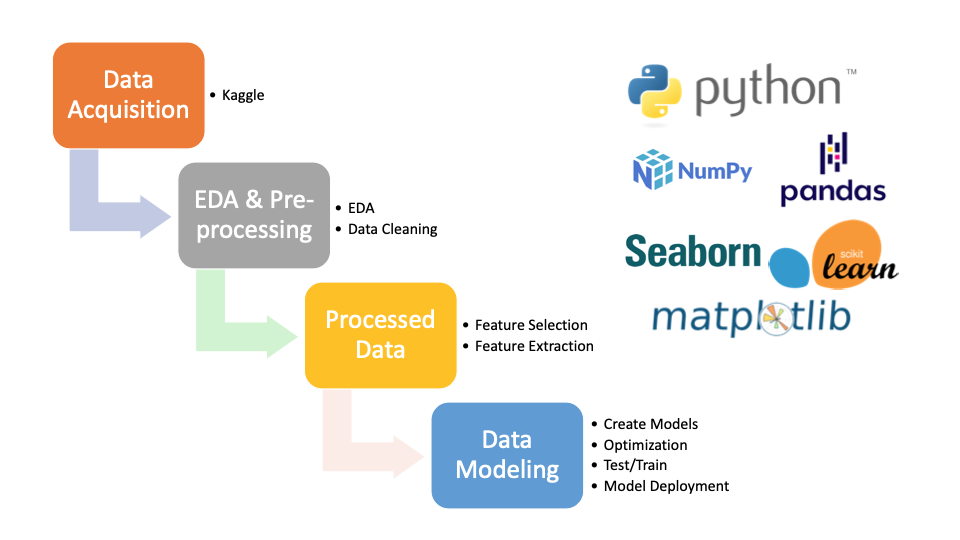



In order to apply all the above skills and use all sort of machine learning APIs more extensively including NLPT, sci-kit learn, TensorFlow and Keras to build an algorithm and pipeline, and I will deploy the ML model to real-time data in Google Cloud Platform. I have done research and read feedback on suggested projects for ML beginners, and decided to proceed with analayzing True and Fake news based on Natural Language Tools. Data was taken from Kaggle and the project is in progress.

Fake news refers to misinformation or disinformation that is spread through word of mouth and social media including facebook, twitter or newspapers. Intentionally deceptive news are becoming a serious issue in the current society, as they could lead to mob violence, murder or suicide.

Throughout the process of getting idea how to perform Natural Language Processing and Text Analytics, I found the following articles and guidelines are very helpful for beginners who are interested in learning NLTK:

**Medium:** https://medium.com/@paritosh_30025/natural-language-processing-text-data-vectorization-af2520529cf7

**Towards Data Science:** https://towardsdatascience.com/gentle-start-to-natural-language-processing-using-python-6e46c07addf3

**Towards Data Science:** https://towardsdatascience.com/nlp-with-spacy-part-1-beginner-guide-to-nlp-4b9460652994

**Towards AI:** https://medium.com/towards-artificial-intelligence/text-mining-in-python-steps-and-examples-78b3f8fd913b

**Towards AI:** https://medium.com/towards-artificial-intelligence/natural-language-processing-nlp-with-python-tutorial-for-beginners-1f54e610a1a0 (highly recommend!)

**DataCamp:** https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk


I will constantly upload the noteboook for updates, so stay tuned!

# Data Collection

**Data Source:** Data is collected from Kaggle https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

There are 2 sets of data - **True.csv** and **Fake.csv**, which consists of ~20,000 and ~18,000 articles, respectively. Each dataset contains the following information:

 - Article Title
 - Article Test
 - Article Subject
 - Article published date

Data was cleaned and uploaded to Kaggle by the creator prior to downloading for analysis and data modeling

**Note**

This notebook has run on both local computer and in google server, the data size was too large and articles length were extremely long, it was too computational heavy for NLP and it kept crashing the sever. Therefore I decided to reduce the sample size to 50%.



In [ ]:
# Mount the drive in order to access the file as we would locally
# The dataset is too large and getting computational heavy, therefore the analysis was done in google cloud instead of locally
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


## Import Libraries and Data

In [ ]:
# import libraries
# more libraries will be imported as I go

# libraries for data processing and data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

%matplotlib inline

# visual representation of text data
from wordcloud import WordCloud, STOPWORDS

# Natural Language Processing Tool Kit Imports
# Importing Natural Language ToolKit and its essential packages
import nltk

# Removing stopwords
from nltk.corpus import stopwords 

# Stemming and Lemmatizing words in the dataframe
# https://medium.com/analytics-vidhya/building-a-simple-chatbot-in-python-using-nltk-7c8c8215ac6e
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Text Cleaning
# Importing string for cleaning string, punctuations, numbers
import string

# Vectorizing Imports
# Importing CountVectorizer to tokenize our articles
# https://towardsdatascience.com/feature-extraction-techniques-d619b56e31be
from sklearn import feature_selection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# libraries for machine learning
# Importing Scaler for Standardizing Data
from sklearn.preprocessing import StandardScaler

# Train and Test splits prior to data modelling
from sklearn.model_selection import train_test_split

# Importing the different models for modelling purposes
# Supervised ML
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB 

# Neural Netowrk
from sklearn.neural_network import MLPClassifier

# Model Scoring and Validation
from sklearn import metrics # Metrics for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# For saving models
import joblib

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# import data
true = pd.read_csv("/content/gdrive/My Drive/Brainstation/Machine Learning/Project/data/True.csv")
true.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [ ]:
# import data
fake = pd.read_csv("/content/gdrive/My Drive/Brainstation/Machine Learning/Project/data/Fake.csv")
fake.tail()

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


## Exploratory data analysis

#### DataFrame check

In [ ]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [ ]:
true.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
true.duplicated().sum()

206

In [ ]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
fake.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
fake.duplicated().sum()

3

#### Create a copy of both DataFrames to avoid changes of the original DataFrames, followed by exploring DataFrames details

In [ ]:
# As mentioned in the beginning, dataset is too large and causing issue in the analysis, as such only 50% data will be used
df_true = true.sample(frac = .50).copy() 
df_fake = fake.sample(frac = .50).copy() 

In [ ]:
#df_true = true.copy()

In [ ]:
# check True dataframe info after trimming
df_true.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10708 entries, 16821 to 19234
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    10708 non-null  object
 1   text     10708 non-null  object
 2   subject  10708 non-null  object
 3   date     10708 non-null  object
dtypes: object(4)
memory usage: 418.3+ KB


In [ ]:
df_true.nunique()

title      10553
text       10658
subject        2
date         696
dtype: int64

In [ ]:
df_true['subject'].unique()

array(['worldnews', 'politicsNews'], dtype=object)

In [ ]:
#df_fake = fake.copy()

In [ ]:
# check Fake dataframe info after trimming
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11740 entries, 4878 to 14908
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    11740 non-null  object
 1   text     11740 non-null  object
 2   subject  11740 non-null  object
 3   date     11740 non-null  object
dtypes: object(4)
memory usage: 458.6+ KB


In [ ]:
df_fake.nunique()

title      10295
text       10038
subject        6
date        1655
dtype: int64

In [ ]:
df_fake['subject'].unique()

array(['News', 'US_News', 'politics', 'left-news', 'Government News',
       'Middle-east'], dtype=object)

#### Data cleanup on the subject column to make it more readible and for consistency

In [ ]:
# change the content in subject column for consistency: create dictionary and assign to the column

# Ture News
true_subject_clean = {'politicsNews' : 'Political News',
                        'worldnews' : 'World News'}

df_true['subject'] = df_true['subject'].map(true_subject_clean)

# Fake News
fake_subject_clean = {'politics' : 'Political News',
                        'Government News' : 'Government News',
                        'News' : 'News',
                        'left-news' : 'Left News',
                        'US_News' : 'US News',
                        'Middle-east' : 'Middle Eastern News'}

df_fake['subject'] = df_fake['subject'].map(fake_subject_clean)

**Data cleanup to check duplicates and drop if any**

In [ ]:
df_true.duplicated().sum()

50

In [ ]:
df_fake.duplicated().sum()

1

#### Add "category" to True and Fake DataFrame, this will be used for categorization and classification in data modelling

In [ ]:
# add new column "label", True will be 1, and Fake will be 0
df_true['category'] = 1
df_fake['category'] = 0

In [ ]:
data_true = df_true.copy()
data_fake = df_fake.copy()

In [ ]:
data_true['True/Fake'] = 'True'
data_fake['True/Fake'] = 'Fake'

In [ ]:
data_true.head()

,title,text,subject,date,category,True/Fake
16821,Yemeni PM says fishermen have seized Iranian v...,DUBAI (Reuters) - An Iranian vessel with 19 sa...,World News,"October 21, 2017",1,True
5584,U.S. court: Ruling on Trump travel ban will no...,WASHINGTON (Reuters) - A U.S. federal appeals ...,Political News,"February 8, 2017",1,True
20144,Region must do more to pressure South Sudan le...,WASHINGTON (Reuters) - African countries shoul...,World News,"September 13, 2017",1,True
16927,Kremlin: Syria peoples' congress being 'active...,MOSCOW (Reuters) - A proposal to convene a con...,World News,"October 20, 2017",1,True
20665,Pope Francis to bless Colombia's war victims,"VILLAVICENCIO/BOGOTA, Colombia (Reuters) - Tho...",World News,"September 8, 2017",1,True


In [ ]:
data_fake.head()

,title,text,subject,date,category,True/Fake
4878,Trump: Dwayne Wade’s Cousin Was Murdered So A...,Donald Trump went to new lows in his efforts t...,News,"August 27, 2016",0,Fake
22678,REPORT: ‘Federal Government Escalated the Viol...,KILLED: Rancher and protest spokesman Robert ...,US News,"January 28, 2016",0,Fake
7677,Ted Cruz Gets Booed At CPAC With Many Walking...,Try as he might to appeal to a broad base of c...,News,"March 5, 2016",0,Fake
6230,Portland Public Schools Tell The Koch Brother...,As schools across the nation are fighting scie...,News,"May 22, 2016",0,Fake
10687,IT’S A MIRACLE! Food Stamp Use Went Down 85% A...,Food Stamp use has miraculously gone down in s...,Political News,"Jun 6, 2017",0,Fake


In [ ]:
# concat and create a new DataFrame for both df_true and df_fake

df_tf = pd.concat([data_true, data_fake])
df_tf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22448 entries, 16821 to 14908
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      22448 non-null  object
 1   text       22448 non-null  object
 2   subject    22448 non-null  object
 3   date       22448 non-null  object
 4   category   22448 non-null  int64 
 5   True/Fake  22448 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


In [ ]:
df_tf.head()

,title,text,subject,date,category,True/Fake
16821,Yemeni PM says fishermen have seized Iranian v...,DUBAI (Reuters) - An Iranian vessel with 19 sa...,World News,"October 21, 2017",1,True
5584,U.S. court: Ruling on Trump travel ban will no...,WASHINGTON (Reuters) - A U.S. federal appeals ...,Political News,"February 8, 2017",1,True
20144,Region must do more to pressure South Sudan le...,WASHINGTON (Reuters) - African countries shoul...,World News,"September 13, 2017",1,True
16927,Kremlin: Syria peoples' congress being 'active...,MOSCOW (Reuters) - A proposal to convene a con...,World News,"October 20, 2017",1,True
20665,Pope Francis to bless Colombia's war victims,"VILLAVICENCIO/BOGOTA, Colombia (Reuters) - Tho...",World News,"September 8, 2017",1,True


In [ ]:
# Recall: True = 1, Fake = 0
df_tf.category.value_counts()

0    11740
1    10708
Name: category, dtype: int64

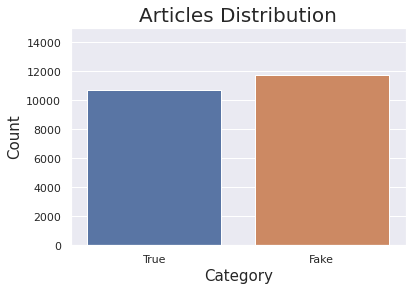

In [ ]:
# To check if there is imbalance data for both True and Fake new data sets
# This is to ensure data are well balacned to avoid skewing analysis and algorithm training
sns.countplot(x='True/Fake', data=df_tf)#color='#597FE7')
plt.title('Articles Distribution',fontsize = 20)
plt.xlabel('Category',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.ylim([0, 15000]);

In [ ]:
df_tf.subject.value_counts()

Political News         9108
World News             5045
News                   4524
Left News              2218
Government News         776
Middle Eastern News     398
US News                 379
Name: subject, dtype: int64

In [ ]:
df_true.subject.value_counts()

Political News    5663
World News        5045
Name: subject, dtype: int64

In [ ]:
df_fake.subject.value_counts()

News                   4524
Political News         3445
Left News              2218
Government News         776
Middle Eastern News     398
US News                 379
Name: subject, dtype: int64

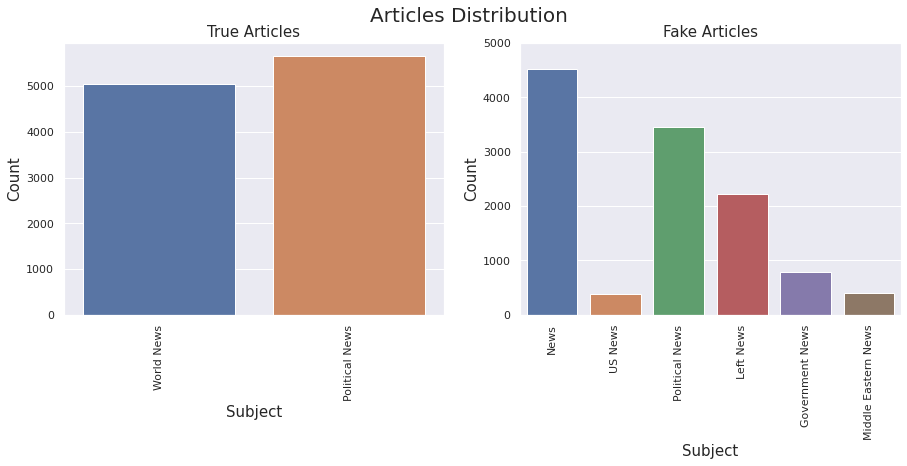

In [ ]:
plt.subplots(1,2, figsize = (15,5))
plt.suptitle('Articles Distribution', fontsize = 20)

plt.subplot(1,2,1)
sns.countplot(x='subject', data=df_true) #color='#597FE7')
plt.title('True Articles',fontsize = 15)
plt.xlabel('Subject',fontsize = 15)
plt.xticks(rotation='90')
plt.ylabel('Count',fontsize = 15)
#plt.ylim([0, 12000])

plt.subplot(1,2,2)
sns.countplot(x='subject', data=df_fake) #color='#597FE7')
plt.title('Fake Articles',fontsize = 15)
plt.xlabel('Subject',fontsize = 15)
plt.xticks(rotation='90')
plt.ylabel('Count',fontsize = 15)
plt.ylim([0, 5000]);


# Data Pre-processing with NLP for text cleaning (Natural Language Processign Tools)

**Uppercase and Lowercase conversion**

It is to convert the entire text to either lowercase or uppercase to unify the same words or phrases. This step will help the algorithm to treat the same words in different cases as different.


**Tokenization**
This is a process to convert normal text strings into a list of tokens. Sentence tokenizer can be used to find the list of sentences and Word tokenizer can be used to find the list of words in strings.


**Stopwords**

Stopwords are the English words which does not add much meaning to a sentence, and that they can be filtered without sacrificing the meaning of the original sentences. Words or punctuation such as 'the', 'he' or 'have' will be excluded. This step is usually done before or after processing of natural language data





### Convert text to lowercase

In [ ]:
# Uppercase and Lowercase conversion
# I will do a word count for column[text] to both True and Fake DataFrames

# remove punctuations
# Source: https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string
df_true['text'] = df_true['text'].str.translate(str.maketrans('', '', string.punctuation))
df_fake['text'] = df_fake['text'].str.translate(str.maketrans('', '', string.punctuation))

# remove numbers
# Source: https://stackoverflow.com/questions/12851791/removing-numbers-from-string/12856384#12856384
df_true['text'] = df_true['text'].str.translate(str.maketrans('', '', string.digits))
df_fake['text'] = df_fake['text'].str.translate(str.maketrans('', '', string.digits))

# convert text to lowercase
df_true['text'] = df_true['text'].str.lower()
df_fake['text'] = df_fake['text'].str.lower()

In [ ]:
# Revisit Uppercase and Lowercase conversion
# I will also create a WordCloud for column[title] to both True and Fake DataFrames

# remove punctuations
df_true['title'] = df_true['title'].str.translate(str.maketrans('', '', string.punctuation))
df_fake['title'] = df_fake['title'].str.translate(str.maketrans('', '', string.punctuation))

# remove numbers
df_true['title'] = df_true['title'].str.translate(str.maketrans('', '', string.digits))
df_fake['title'] = df_fake['title'].str.translate(str.maketrans('', '', string.digits))

# convert texts to lowercase
df_true['title'] = df_true['title'].str.lower()
df_fake['title'] = df_fake['title'].str.lower()

In [ ]:
# check DataFrame to ensure text are processed before proceeding to the next step
df_true.head()

,title,text,subject,date,category
16821,yemeni pm says fishermen have seized iranian v...,dubai reuters an iranian vessel with sailors...,World News,"October 21, 2017",1
5584,us court ruling on trump travel ban will not c...,washington reuters a us federal appeals court...,Political News,"February 8, 2017",1
20144,region must do more to pressure south sudan le...,washington reuters african countries should d...,World News,"September 13, 2017",1
16927,kremlin syria peoples congress being actively ...,moscow reuters a proposal to convene a congre...,World News,"October 20, 2017",1
20665,pope francis to bless colombias war victims,villavicenciobogota colombia reuters thousand...,World News,"September 8, 2017",1


In [ ]:
# check DataFrame to ensure text are processed before proceeding to the next step
df_fake.head()

,title,text,subject,date,category
4878,trump dwayne wade’s cousin was murdered so af...,donald trump went to new lows in his efforts t...,News,"August 27, 2016",0
22678,report ‘federal government escalated the viole...,killed rancher and protest spokesman robert ...,US News,"January 28, 2016",0
7677,ted cruz gets booed at cpac with many walking...,try as he might to appeal to a broad base of c...,News,"March 5, 2016",0
6230,portland public schools tell the koch brother...,as schools across the nation are fighting scie...,News,"May 22, 2016",0
10687,it’s a miracle food stamp use went down after...,food stamp use has miraculously gone down in s...,Political News,"Jun 6, 2017",0


### Mean word counts in Title and Text for both True and Fake Articles

In [ ]:
# Confirmed changes were made in both DataFrames, next step is to do a word count for 'Title' and 'Text'
# This will help us to understand the # words would represent an article could be true or fake
# how to use lambda: https://realpython.com/python-lambda/
# can also use this as reference: https://www.youtube.com/watch?v=8zMpRzXxAcA

# word count in the 'title' column in True articles 
df_true['Title Word Count'] = df_true['title'].apply(lambda x: len(x.split(' ')))

# word count in the 'text' column in True articles 
df_true['Text Word Count'] = df_true['text'].apply(lambda x: len(x.split(' ')))

# word count in the 'title' column in Fake articles 
df_fake['Title Word Count'] = df_fake['title'].apply(lambda x: len(x.split(' ')))

# word count in the 'text' column in Fake articles 
df_fake['Text Word Count'] = df_fake['text'].apply(lambda x: len(x.split(' ')))


In [ ]:
# Check DataFrame to ensure new columns are added
df_true.head()

,title,text,subject,date,category,Title Word Count,Text Word Count
16821,yemeni pm says fishermen have seized iranian v...,dubai reuters an iranian vessel with sailors...,World News,"October 21, 2017",1,9,193
5584,us court ruling on trump travel ban will not c...,washington reuters a us federal appeals court...,Political News,"February 8, 2017",1,11,64
20144,region must do more to pressure south sudan le...,washington reuters african countries should d...,World News,"September 13, 2017",1,14,372
16927,kremlin syria peoples congress being actively ...,moscow reuters a proposal to convene a congre...,World News,"October 20, 2017",1,7,92
20665,pope francis to bless colombias war victims,villavicenciobogota colombia reuters thousand...,World News,"September 8, 2017",1,7,604


In [ ]:
# Check DataFrame to ensure new columns are added
df_fake.head()

,title,text,subject,date,category,Title Word Count,Text Word Count
4878,trump dwayne wade’s cousin was murdered so af...,donald trump went to new lows in his efforts t...,News,"August 27, 2016",0,15,379
22678,report ‘federal government escalated the viole...,killed rancher and protest spokesman robert ...,US News,"January 28, 2016",0,8,652
7677,ted cruz gets booed at cpac with many walking...,try as he might to appeal to a broad base of c...,News,"March 5, 2016",0,17,274
6230,portland public schools tell the koch brother...,as schools across the nation are fighting scie...,News,"May 22, 2016",0,12,616
10687,it’s a miracle food stamp use went down after...,food stamp use has miraculously gone down in s...,Political News,"Jun 6, 2017",0,14,540


In [ ]:
df_true.describe()

,category,Title Word Count,Text Word Count
count,10708.0,10708.000000,10708.000000
mean,1.0,9.954333,393.132705
std,0.0,1.703113,279.248690
min,1.0,4.000000,2.000000
25%,1.0,9.000000,157.000000
50%,1.0,10.000000,366.000000
75%,1.0,11.000000,535.000000
max,1.0,20.000000,5175.000000


In [ ]:
df_fake.describe()

,category,Title Word Count,Text Word Count
count,11740.0,11740.00000,11740.000000
mean,0.0,15.14029,434.124532
std,0.0,4.23118,411.616126
min,0.0,1.00000,1.000000
25%,0.0,12.00000,246.750000
50%,0.0,15.00000,374.000000
75%,0.0,17.00000,520.000000
max,0.0,45.00000,8436.000000


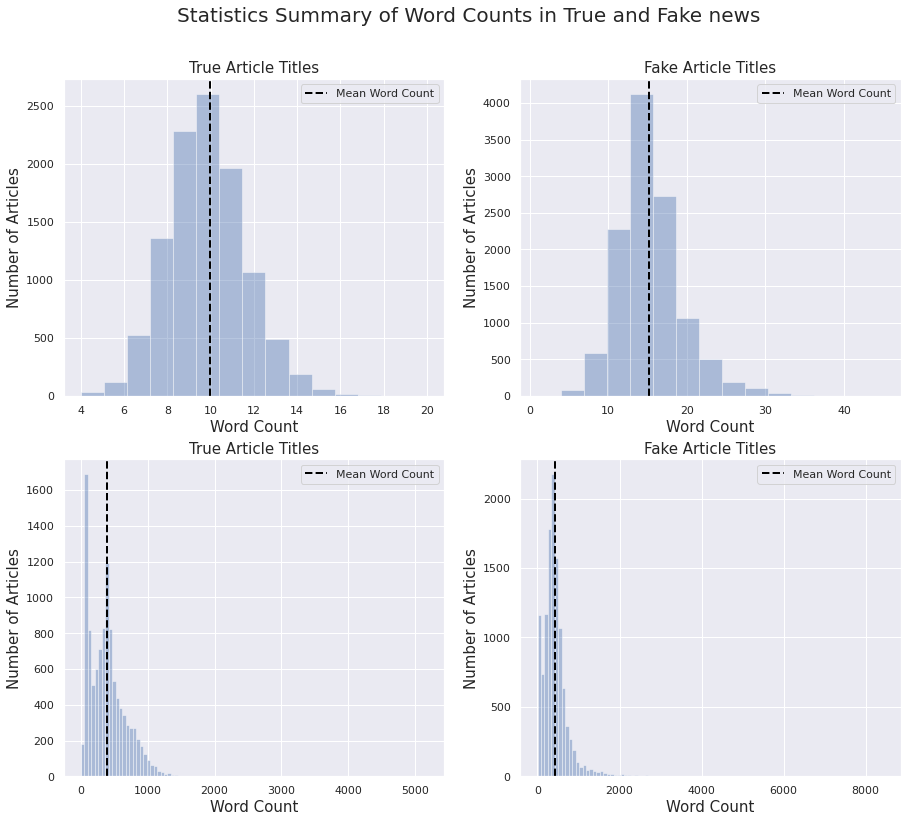

In [ ]:
# Next step is to construct graphs using the above data for better visualization
plt.subplots(2,2, figsize = (15,12.5))
plt.subplots_adjust(top = 0.9)
plt.suptitle('Statistics Summary of Word Counts in True and Fake news', fontsize = 20)

# Plot graph for True Article title word count
plt.subplot(2,2,1)
sns.distplot(df_true['Title Word Count'], bins = 15, kde=False)
plt.title('True Article Titles',fontsize = 15)
plt.xlabel('Word Count',fontsize = 15)
plt.ylabel('Number of Articles',fontsize = 15)
plt.axvline(x=df_true['Title Word Count'].mean(),
            linewidth = 2,
            linestyle = '--',
            color = 'black', label = 'Mean Word Count')
plt.legend()

# Plot graph for False Article title word count
plt.subplot(2,2,2)
sns.distplot(df_fake['Title Word Count'], bins = 15, kde=False)
plt.title('Fake Article Titles',fontsize = 15)
plt.xlabel('Word Count',fontsize = 15)
plt.ylabel('Number of Articles',fontsize = 15)
plt.axvline(x=df_fake['Title Word Count'].mean(),
            linewidth = 2,
            linestyle = '--',
            color = 'black', label = 'Mean Word Count')
plt.legend()

# Plot graph for True Article Text word count
plt.subplot(2,2,3)
sns.distplot(df_true['Text Word Count'], bins = 100, kde=False)
plt.title('True Article Titles',fontsize = 15)
plt.xlabel('Word Count',fontsize = 15)
plt.ylabel('Number of Articles',fontsize = 15)
plt.axvline(x=df_true['Text Word Count'].mean(),
            linewidth = 2,
            linestyle = '--',
            color = 'black', label = 'Mean Word Count')
plt.legend()

# Plot graph for True Article Text word count
plt.subplot(2,2,4)
sns.distplot(df_fake['Text Word Count'], bins = 100, kde=False)
plt.title('Fake Article Titles',fontsize = 15)
plt.xlabel('Word Count',fontsize = 15)
plt.ylabel('Number of Articles',fontsize = 15)
plt.axvline(x=df_fake['Text Word Count'].mean(),
            linewidth = 2,
            linestyle = '--',
            color = 'black', label = 'Mean Word Count')
plt.legend();

In [ ]:
#Based of the summary table and distribution graphs, majority of new articles
#Some lengthy articles could skewed the results for further algorithm development, therefore I need to set a threshold and eliminate some data
#tested 2500, 3000 and 3500 to find an optimal threshold

In [ ]:
# Set threshold to drop articles that skewed the analysis for True Articles

print('Total articles that have words>2500 the text column:')
print(len(df_true[df_true['Text Word Count'] > 2500]))
print()

# Printing out the propotion to see how much of our data is outside of our distributions
print('Percent of true articles will be elimiated:')
print(len(df_true[df_true['Text Word Count'] > 2500]) / len(df_true)*100)
print()

Total articles that have words>2500 the text column:
4

Percent of true articles will be elimiated:
0.03735524841240195



In [ ]:
# Set threshold to drop articles that skewed the analysis for Fake Articles

print('Total articles that have words >3000 the text column:')
print(len(df_fake[df_fake['Text Word Count'] > 3000]))
print()

# Printing out the propotion to see how much of our data is outside of our distributions
print('Percent of true articles wull be eliminated:')
print(len(df_fake[df_fake['Text Word Count'] > 3000]) / len(df_fake)*100)
print()

Total articles that have words >3000 the text column:
41

Percent of true articles wull be eliminated:
0.3492333901192504



In [ ]:
# Drop data that are beyond the set threshold
df_true.drop(df_true[df_true['Text Word Count'] < 20].index, inplace = True)
df_true.drop(df_true[df_true['Text Word Count']>2500].index, inplace=True)
df_true.reset_index(drop = True, inplace = True)
df_true.describe()
df_true.duplicated().sum()

50

In [ ]:
df_true.drop_duplicates(inplace = True)
df_true.duplicated().sum()

0

In [ ]:
# reset index
df_true.reset_index(drop = True, inplace = True)
df_true.head()

,title,text,subject,date,category,Title Word Count,Text Word Count
0,yemeni pm says fishermen have seized iranian v...,dubai reuters an iranian vessel with sailors...,World News,"October 21, 2017",1,9,193
1,us court ruling on trump travel ban will not c...,washington reuters a us federal appeals court...,Political News,"February 8, 2017",1,11,64
2,region must do more to pressure south sudan le...,washington reuters african countries should d...,World News,"September 13, 2017",1,14,372
3,kremlin syria peoples congress being actively ...,moscow reuters a proposal to convene a congre...,World News,"October 20, 2017",1,7,92
4,pope francis to bless colombias war victims,villavicenciobogota colombia reuters thousand...,World News,"September 8, 2017",1,7,604


In [ ]:
# Drop data that are beyond the set threshold
df_fake.drop(df_fake[df_fake['Text Word Count']<20].index, inplace=True)
df_fake.drop(df_fake[df_fake['Text Word Count']>3000].index, inplace=True)
df_fake.reset_index(drop = True, inplace = True)
df_fake.describe()
df_fake.duplicated().sum()

1

In [ ]:
df_fake.drop_duplicates(inplace = True)
df_fake.duplicated().sum()

0

In [ ]:
df_fake.reset_index(drop = True, inplace = True)
df_fake.head()

,title,text,subject,date,category,Title Word Count,Text Word Count
0,trump dwayne wade’s cousin was murdered so af...,donald trump went to new lows in his efforts t...,News,"August 27, 2016",0,15,379
1,report ‘federal government escalated the viole...,killed rancher and protest spokesman robert ...,US News,"January 28, 2016",0,8,652
2,ted cruz gets booed at cpac with many walking...,try as he might to appeal to a broad base of c...,News,"March 5, 2016",0,17,274
3,portland public schools tell the koch brother...,as schools across the nation are fighting scie...,News,"May 22, 2016",0,12,616
4,it’s a miracle food stamp use went down after...,food stamp use has miraculously gone down in s...,Political News,"Jun 6, 2017",0,14,540


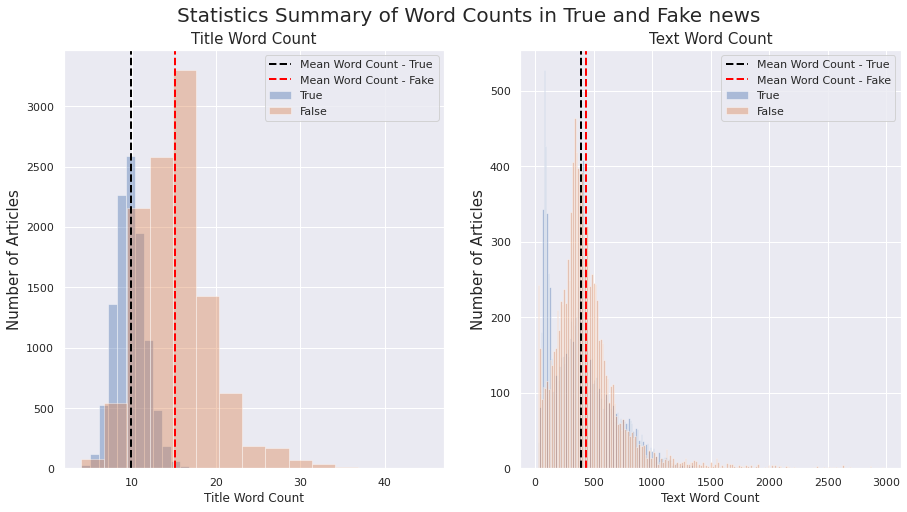

In [ ]:
# After dropping the outliers and duplicated data, let's replot the distribution graph for visualization
plt.subplots(1,2, figsize = (15,7.5))
plt.subplots_adjust(top = 0.9)
plt.suptitle('Statistics Summary of Word Counts in True and Fake news', fontsize = 20)

# Plot graph for Title Word Count
plt.subplot(1,2,1)
sns.distplot(df_true['Title Word Count'], bins = 15, label = 'True', kde = False)
sns.distplot(df_fake['Title Word Count'], bins = 15, label = 'False', kde = False)
plt.title('Title Word Count',fontsize = 15)
#plt.xlabel('Word Count',fontsize = 15)
plt.ylabel('Number of Articles',fontsize = 15)
plt.axvline(x=df_true['Title Word Count'].mean(),
            linewidth = 2,
            linestyle = '--',
            color = 'black', label = 'Mean Word Count - True')
plt.axvline(x=df_fake['Title Word Count'].mean(),
            linewidth = 2,
            linestyle = '--',
            color = 'red', label = 'Mean Word Count - Fake')
plt.legend()

# Plot graph for Text Word Count
plt.subplot(1,2,2)
sns.distplot(df_true['Text Word Count'], bins = 200, label = 'True', kde = False)
sns.distplot(df_fake['Text Word Count'], bins = 200, label = 'False', kde = False)
plt.title('Text Word Count',fontsize = 15)
#plt.xlabel('Word Count',fontsize = 15)
plt.ylabel('Number of Articles',fontsize = 15)
plt.axvline(x=df_true['Text Word Count'].mean(),
            linewidth = 2,
            linestyle = '--',
            color = 'black', label = 'Mean Word Count - True')
plt.axvline(x=df_fake['Text Word Count'].mean(),
            linewidth = 2,
            linestyle = '--',
            color = 'red', label = 'Mean Word Count - Fake')
plt.legend();


### Create WordClouds

**WordCloud**

Word Cloud is a data visualization tool to represent the word frequency and importance based on the font size - it is a technique commonly used for analyzing text data from social media websites.

I used the following website to assist me in setting the syntax: https://www.geeksforgeeks.org/generating-word-cloud-python/


**To get a better sense of the common words that were seen or used in the News title and text**

note that I would like to do a WordCloud analysis of text as well, however it was computational heavy and I had a hard time running

In [ ]:
# WordClouds for words in Titles for df_true
# Setting up or stopwords 
#%%time
stopwords = set(STOPWORDS)

# Creating a list of words 
words_df_true_title = ''

# Iterating over every word in our column
for word in df_true['title']:

# Iterate over text and split it
    word = word.split()
    
    # Converting each word into lowercase using a for loop
    for i in range(len(word)):
                   word[i] = word[i].lower()
                   words_df_true_title += " ".join(word)+" "

# Intializing a Word Cloud 
wc_df_true_title = WordCloud(width = 500,
                                   height = 500,
                                   background_color = 'black',
                                   stopwords = stopwords).generate(words_df_true_title)

In [ ]:
# WordClouds for words in Titles for df_fake
# Setting up or stopwords 
#%%time
stopwords = set(STOPWORDS)

# Creating a list of words 
words_df_fake_title = ''

# Iterating over every word in our column
for word in df_fake['title']:

# Iterate over text and split it
    word = word.split()
    
    # Converting each word into lowercase using a for loop
    for i in range(len(word)):
                   word[i] = word[i].lower()
                   words_df_fake_title += " ".join(word)+" "

# Intializing a Word Cloud 
wc_df_fake_title = WordCloud(width = 500,
                                   height = 500,
                                   background_color = 'black',
                                   stopwords = stopwords).generate(words_df_fake_title)

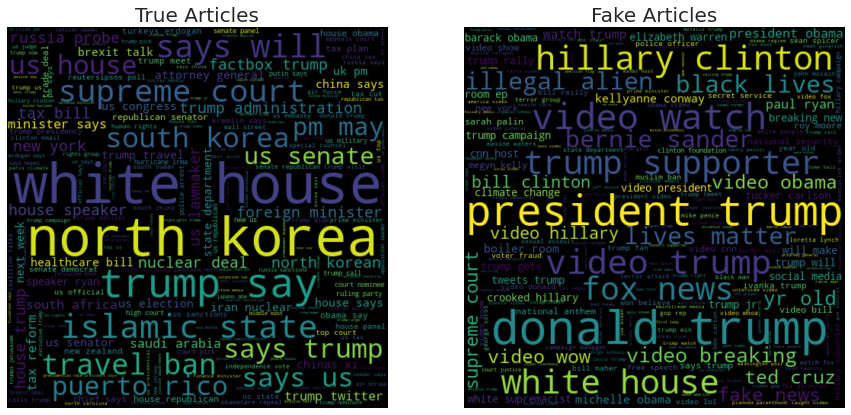

In [ ]:
# plot WordCloud image for News Title
# a good resource to guide doing subplot 
# https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html
# https://python-graph-gallery.com/261-custom-python-wordcloud/

plt.subplots(1,2, figsize = (15,15))
plt.subplots_adjust(top = 0.9)

# WordCloud for True News DataFrame
plt.subplot(1,2,1)
plt.imshow(wc_df_true_title, interpolation="bilinear")
plt.title('True Articles', fontsize = 20)
plt.axis('off')

# WordCloud for Fake News DataFrame
plt.subplot(1,2,2)
plt.imshow(wc_df_fake_title, interpolation="bilinear")
plt.title('Fake Articles', fontsize = 20)
plt.axis('off')

plt.show();

### Articles published date analysis

In [ ]:
# Converting date column data type from object to datetime
df_true['date'] = pd.to_datetime(df_true['date'])
df_fake['date'] = pd.to_datetime(df_fake['date'], errors = 'coerce')

# Converting date columns into year, month and day
# Extracting the year of publishing
df_true['Year'] = df_true['date'].dt.year
df_fake['Year'] = df_fake['date'].dt.year

# Extracting the month of the year
df_true['Month'] = df_true['date'].dt.month
df_fake['Month'] = df_fake['date'].dt.month

# Extracting the day of the month
df_true['Day'] = df_true['date'].dt.day
df_fake['Day'] = df_fake['date'].dt.day

In [ ]:
# dataframe check
df_true.head()

,title,text,subject,date,category,Title Word Count,Text Word Count,Year,Month,Day
0,yemeni pm says fishermen have seized iranian v...,dubai reuters an iranian vessel with sailors...,World News,2017-10-21,1,9,193,2017,10,21
1,us court ruling on trump travel ban will not c...,washington reuters a us federal appeals court...,Political News,2017-02-08,1,11,64,2017,2,8
2,region must do more to pressure south sudan le...,washington reuters african countries should d...,World News,2017-09-13,1,14,372,2017,9,13
3,kremlin syria peoples congress being actively ...,moscow reuters a proposal to convene a congre...,World News,2017-10-20,1,7,92,2017,10,20
4,pope francis to bless colombias war victims,villavicenciobogota colombia reuters thousand...,World News,2017-09-08,1,7,604,2017,9,8


In [ ]:
# data type check
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10653 entries, 0 to 10652
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             10653 non-null  object        
 1   text              10653 non-null  object        
 2   subject           10653 non-null  object        
 3   date              10653 non-null  datetime64[ns]
 4   category          10653 non-null  int64         
 5   Title Word Count  10653 non-null  int64         
 6   Text Word Count   10653 non-null  int64         
 7   Year              10653 non-null  int64         
 8   Month             10653 non-null  int64         
 9   Day               10653 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 832.4+ KB


In [ ]:
# Double check the true dataframe has no NA
df_true.isna().sum()

title               0
text                0
subject             0
date                0
category            0
Title Word Count    0
Text Word Count     0
Year                0
Month               0
Day                 0
dtype: int64

In [ ]:
# dataframe check
df_fake.head()

,title,text,subject,date,category,Title Word Count,Text Word Count,Year,Month,Day
0,trump dwayne wade’s cousin was murdered so af...,donald trump went to new lows in his efforts t...,News,2016-08-27,0,15,379,2016,8,27
1,report ‘federal government escalated the viole...,killed rancher and protest spokesman robert ...,US News,2016-01-28,0,8,652,2016,1,28
2,ted cruz gets booed at cpac with many walking...,try as he might to appeal to a broad base of c...,News,2016-03-05,0,17,274,2016,3,5
3,portland public schools tell the koch brother...,as schools across the nation are fighting scie...,News,2016-05-22,0,12,616,2016,5,22
4,it’s a miracle food stamp use went down after...,food stamp use has miraculously gone down in s...,Political News,2017-06-06,0,14,540,2017,6,6


In [ ]:
# data type check
# why year, month and day are float and not int?
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11190 entries, 0 to 11189
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             11190 non-null  object        
 1   text              11190 non-null  object        
 2   subject           11190 non-null  object        
 3   date              11190 non-null  datetime64[ns]
 4   category          11190 non-null  int64         
 5   Title Word Count  11190 non-null  int64         
 6   Text Word Count   11190 non-null  int64         
 7   Year              11190 non-null  int64         
 8   Month             11190 non-null  int64         
 9   Day               11190 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 874.3+ KB


In [ ]:
# Double check the fake dataframe has no NA
df_fake.isna().sum()

title               0
text                0
subject             0
date                0
category            0
Title Word Count    0
Text Word Count     0
Year                0
Month               0
Day                 0
dtype: int64

In [ ]:
df_fake.describe()

,category,Title Word Count,Text Word Count,Year,Month,Day
count,11190.0,11190.000000,11190.000000,11190.000000,11190.000000,11190.000000
mean,0.0,15.169794,438.073190,2016.292404,6.314656,15.474978
std,0.0,4.217555,307.405204,0.650131,3.359172,8.760334
min,0.0,4.000000,20.000000,2015.000000,1.000000,1.000000
25%,0.0,13.000000,270.000000,2016.000000,3.000000,8.000000
50%,0.0,15.000000,384.000000,2016.000000,6.000000,15.000000
75%,0.0,17.000000,526.750000,2017.000000,9.000000,23.000000
max,0.0,45.000000,2977.000000,2018.000000,12.000000,31.000000


In [ ]:
# Since there is null values in the Fake Dataframe, these empty data need to be filled
# Median would be the option to use based on the 50% percentile from the described table 

df_fake['Year'] = df_fake['Year'].fillna(df_fake['Year'].median())

df_fake['Month'] = df_fake['Month'].fillna(df_fake['Year'].median())

df_fake['Day'] = df_fake['Day'].fillna(df_fake['Day'].median())

In [ ]:
# reset dataframe index
df_true.reset_index(drop = True, inplace = True)
df_fake.reset_index(drop = True, inplace = True)

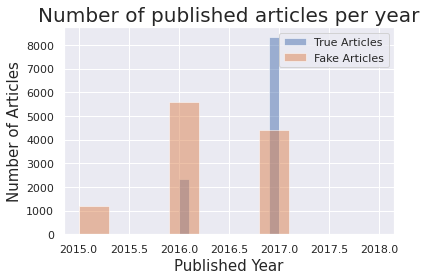

In [ ]:
# Making our first subplot
plt.title('Number of published articles per year', fontsize = 20)
plt.hist(df_true['Year'], alpha = 0.5, label = 'True Articles')
plt.hist(df_fake['Year'], alpha = 0.5, label = 'Fake Articles')
plt.xlabel('Published Year', fontsize = 15)
plt.ylabel('Number of Articles', fontsize = 15)
plt.legend()
plt.tight_layout()
plt.show()

### Tokenization

Next step I would like compare the top 30 words used in the True and Fake News dataset, information will be extracted and put together in a DataFrame. 

To understand more about vectorization:

- **Towards Data Science:** https://towardsdatascience.com/natural-language-processing-count-vectorization-with-scikit-learn-e7804269bb5e

- **Kaggle:** https://www.kaggle.com/adamschroeder/countvectorizer-tfidfvectorizer-predict-comments

Here is a good examples of how to setup the syntax:

- **Stack overflow:** https://stackoverflow.com/questions/55994883/how-to-use-countvectorizer-to-test-new-data-after-doing-some-training

In [ ]:
%%time 
# Setting up our variables
true_text = df_true['text']
fake_text = df_fake['text']

# Call for the vectorizer model
vect_true = CountVectorizer(stop_words = 'english')
vect_fake = CountVectorizer(stop_words = 'english')

# Fit and transform the Vectorizer for the two data set
# side note to myself: always set variable for 'fit_transform'
true_text = vect_true.fit_transform(true_text)
fake_text = vect_fake.fit_transform(fake_text)


CPU times: user 5.5 s, sys: 3.49 ms, total: 5.5 s
Wall time: 5.51 s


After vectorization, I would like to place the output DataFrame side-by-side for comparison. Here is a good example for further instructions:

**Stack overflow:** https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side

In [ ]:
# Exact and conclude results in a DataFrame format
df_vect_true = pd.DataFrame(columns=vect_true.get_feature_names(), data=true_text.toarray())

In [ ]:
df_vect_fake = pd.DataFrame(columns=vect_fake.get_feature_names(), data=fake_text.toarray())

In [ ]:
# Create word count variable
word_count = 30

# Create new dataframe and adds up across axis 0 to get the count of words
df_true_wordcount = pd.DataFrame(df_vect_true.sum(axis = 0).reset_index())
df_fake_wordcount = pd.DataFrame(df_vect_fake.sum(axis = 0).reset_index())

# Rename columns
df_true_wordcount.columns = ['Word', 'Word Count']
df_fake_wordcount.columns = ['Word', 'Word Count']

# Reset index for this new dataframe
df_true_wordcount.reset_index(inplace = True, drop = True)
df_fake_wordcount.reset_index(inplace = True, drop = True)

# Extract top 30 words in descending order for both True and Fake news
top_30_true = df_true_wordcount.sort_values(by = 'Word Count', ascending = False).head(word_count)
top_30_fake = df_fake_wordcount.sort_values(by = 'Word Count', ascending = False).head(word_count)


In [ ]:
from IPython.display import display_html
# Defining function
def display(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    

In [ ]:
# Display the 2 DataFrame side-by-side for comparision
display(top_30_true, top_30_fake)

,Word,Word Count
43500,said,48784
51618,trump,26921
42149,reuters,14058
38741,president,13033
47547,state,9780
20397,government,8950
33658,new,8327
47599,states,8234
22951,house,8090
52690,united,7698


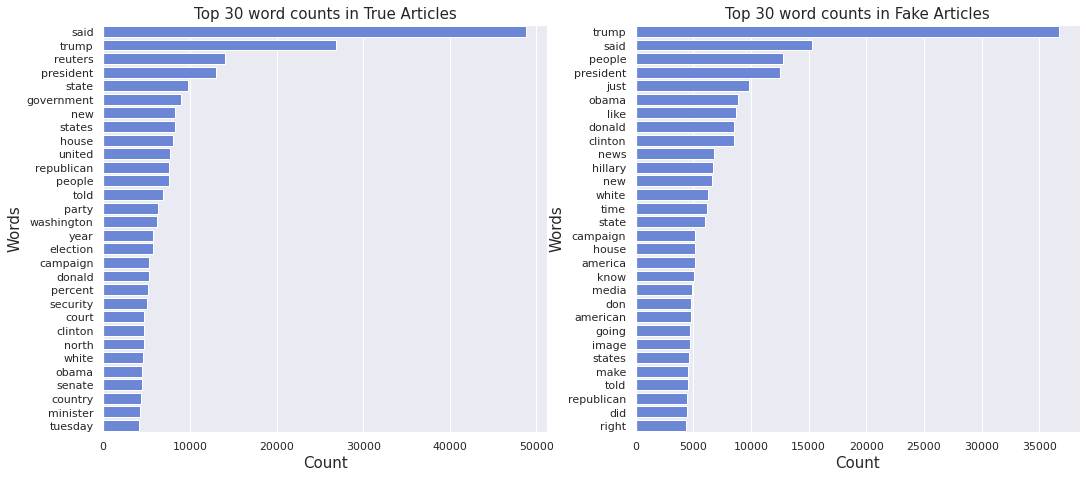

In [ ]:
# To Summarize the two DataFrame into a histograph
plt.subplots(1,2, figsize = (17.5,7.5))

plt.subplot(1,2,1)
sns.barplot(x='Word Count', y='Word', data=top_30_true, color='#597FE7')
plt.title('Top 30 word counts in True Articles',fontsize = 15)
plt.xlabel('Count',fontsize = 15)
plt.ylabel('Words',fontsize = 15)

plt.subplot(1,2,2)
sns.barplot(x='Word Count', y='Word', data=top_30_fake, color='#597FE7')
plt.title('Top 30 word counts in Fake Articles',fontsize = 15)
plt.xlabel('Count',fontsize = 15)
plt.ylabel('Words',fontsize = 15);

#### Create a list of stopwords

In [ ]:
# To create a new stopwords list, I compare the above 2 charts for overlapped words and added to the stopwords list
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwordslist = list(stopwords)
stopwordslist.extend(('said','trump','reuters','president','state','government','states','new','house','united',
                       'clinton','obama','donald','like','news','just', 'campaign', 'washington', 'election',
                        'party', 'republican', 'image', 'just', 'states'))

# Chck if the words were added to the list
print(stopwordslist)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [ ]:
df_true['category'] = 1
df_fake['category'] = 0

In [ ]:
concat_tf = pd.concat([df_true, df_fake])
concat_tf.reset_index(drop = True, inplace = True)
concat_tf.head()

,title,text,subject,date,category,Title Word Count,Text Word Count,Year,Month,Day
0,yemeni pm says fishermen have seized iranian v...,dubai reuters an iranian vessel with sailors...,World News,2017-10-21,1,9,193,2017,10,21
1,us court ruling on trump travel ban will not c...,washington reuters a us federal appeals court...,Political News,2017-02-08,1,11,64,2017,2,8
2,region must do more to pressure south sudan le...,washington reuters african countries should d...,World News,2017-09-13,1,14,372,2017,9,13
3,kremlin syria peoples congress being actively ...,moscow reuters a proposal to convene a congre...,World News,2017-10-20,1,7,92,2017,10,20
4,pope francis to bless colombias war victims,villavicenciobogota colombia reuters thousand...,World News,2017-09-08,1,7,604,2017,9,8


In [ ]:
concat_tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21843 entries, 0 to 21842
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             21843 non-null  object        
 1   text              21843 non-null  object        
 2   subject           21843 non-null  object        
 3   date              21843 non-null  datetime64[ns]
 4   category          21843 non-null  int64         
 5   Title Word Count  21843 non-null  int64         
 6   Text Word Count   21843 non-null  int64         
 7   Year              21843 non-null  int64         
 8   Month             21843 non-null  int64         
 9   Day               21843 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 1.7+ MB


In [ ]:
concat_tf.shape

(21843, 10)

In [ ]:
# save new CSV data file
#concat_tf.to_csv('data/concat_tf.csv')

To summarize, the following changes have been made on my dataset before moving forward:

1. Dropped duplicated data
2. Fill in missing data based on the DataFrame description
3. Rename subject column
4. Ensure the data in both data sets are balanced
5. Performed analyses including news subject distribution and date published distribution
6. Analysed, visualized and compared Top words used in the articles Title and Text
7. Categorized True and Fake news to 1 and 0, respectively
8. Combined dataframe for further analysis and data modelling
9. Create a new CSV file for the cleaned data

# Feature Extraction - Vectorization
**1. Bag of Words (BOW)**

BOW is a representation or measure of text that describes the occurance of words within a document.

**2. Term Frequency-Inverse Document Frequency (TF-IDF)**

TF-IDP is a numerical representation that reflects the importance of a word is to a document within a collection of words

**3. Stemming**

Stemming removes prefix or suffix from a word leaving only a stem


**4. Lemmatization**

Lemmatization factors in the word's part of speech and meaning and results in a **real world**

For more information can look at this article: https://medium.com/analytics-vidhya/building-a-simple-chatbot-in-python-using-nltk-7c8c8215ac6e

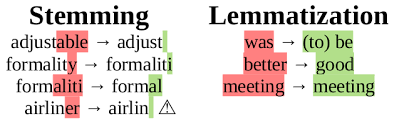

**Towards AI:** https://medium.com/towards-artificial-intelligence/natural-language-processing-nlp-with-python-tutorial-for-beginners-1f54e610a1a0#2847

**KDNuggets:** https://www.kdnuggets.com/2018/08/wtf-tf-idf.html

In [ ]:
# There are various stemming algorithm out there.
# Here I picked Porter's Stemmer as it produces the best output while has the lowest error rate

# Create new variable (see above)
wordlist = stopwordslist

# Create tokenizer to clean data using stemmer
stemmer = PorterStemmer()

def stemming_tokenizer(text):
    
    for word in text:
        listofwords = text.split(' ')
        
    # Create a list to hold stemmed words
    listofstemmed_words = []
    
    for word in listofwords:
        if (not word in wordlist) and (word != ''):
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)
            
    return listofstemmed_words

In [ ]:
# Creat tokenizer to clean data using lemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatization_tokenizer(text):
    
    for word in text:
        listofwords = text.split(' ')
    
    # Create a list to hold the lemmatized words
    listoflemmatized_words = []
    
    
    for word in listofwords:
        if (not word in wordlist) and (word != ''):
            lemmatized_word = lemmatizer.lemmatize(word)
            listoflemmatized_words.append(lemmatized_word)
            
    return listoflemmatized_words

In [ ]:
# recap DataFrame
concat_tf.head()

,title,text,subject,date,category,Title Word Count,Text Word Count,Year,Month,Day
0,yemeni pm says fishermen have seized iranian v...,dubai reuters an iranian vessel with sailors...,World News,2017-10-21,1,9,193,2017,10,21
1,us court ruling on trump travel ban will not c...,washington reuters a us federal appeals court...,Political News,2017-02-08,1,11,64,2017,2,8
2,region must do more to pressure south sudan le...,washington reuters african countries should d...,World News,2017-09-13,1,14,372,2017,9,13
3,kremlin syria peoples congress being actively ...,moscow reuters a proposal to convene a congre...,World News,2017-10-20,1,7,92,2017,10,20
4,pope francis to bless colombias war victims,villavicenciobogota colombia reuters thousand...,World News,2017-09-08,1,7,604,2017,9,8


**To define the DataFrame and setup variables to perform training and testing split for the models:**

In [ ]:
# To setup my training model (train_test_split), I will first create variables for features (X) and targets (y)
# https://towardsdatascience.com/3-things-you-need-to-know-before-you-train-test-split-869dfabb7e50

# Create model objects:
# Create features
X = concat_tf['text']

# Create targets
y = concat_tf['category']

# Create train_test_split model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42, stratify = y)

In [ ]:
# Dataframe revisit
concat_tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21812 entries, 0 to 21811
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             21812 non-null  object        
 1   text              21812 non-null  object        
 2   subject           21812 non-null  object        
 3   date              21811 non-null  datetime64[ns]
 4   category          21812 non-null  int64         
 5   Title Word Count  21812 non-null  int64         
 6   Text Word Count   21812 non-null  int64         
 7   Year              21812 non-null  float64       
 8   Month             21812 non-null  float64       
 9   Day               21812 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 1.7+ MB


**Based on the above articles I suggested above, Vectorization the data using, Count Vecotrizer, Bag of Words model and Term Frequency - Inverse Document Frequency (TF-IDF) model would give us the most ideal results and depiction of articles**

Before setting the algorithm for Count Vectorizer and TD-IFD Vectorization, I re-visited the sklearn API to determine the parameters I should use:

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

- **```tokenizer```** as **stemming_tokenizer** 
- **```tokenizer```** as **lemmatization_tokenizer** 
- **``min_df``** as 500
- **``stopwords``** as 'english' and 'wordlist' (see above settings)

##Bag fo Words (BOW)

BOW refers to for each input, a word vector is created containing for all unique words in the dataset, and the values of the vector are the counts of the occurrences of the word in a particular piece of input text.

- Vectorization using the Bag of Words model:
    - Using only removing stopwords and keeping a min_df
    - Using Stemming techniques
    - Using Lemmatization techniques 

### 1. Vectorization using Bag of Words and Stopwords
**Use only min_df and stopwords with a Count Vectorizer**

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
%%time
# Create model
vectorizer = CountVectorizer(min_df = 500, stop_words = 'english')

# Fit and transform data for X_train
X_train_vectorizer = vectorizer.fit_transform(X_train)

# Transform data for test
X_test_vectorizer = vectorizer.transform(X_test)


CPU times: user 4.63 s, sys: 36.5 ms, total: 4.67 s
Wall time: 4.67 s


In [ ]:
# Transform the information in to DataFrame for visualization
df_vectorizer = pd.DataFrame(columns=vectorizer.get_feature_names(), data=X_train_vectorizer.toarray())
df_vectorizer.head()

,able,absolutely,access,according,account,accused,act,action,actions,actually,added,adding,address,administration,adviser,agencies,agency,agenda,ago,agreed,agreement,ahead,air,allegations,alleged,allies,allow,allowed,america,american,americans,announced,apparently,appeared,appears,april,area,areas,armed,army,...,voting,wall,want,wanted,wants,war,warned,washington,wasn,watch,way,weapons,website,wednesday,week,weeks,went,west,western,white,wife,win,wire,woman,women,won,words,work,worked,workers,working,world,wrong,wrote,year,yearold,years,yes,york,young
0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,3,0,0,0,0,1,1,1,1,0,0
1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,4,0,0,0,0,4,0,2,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Create new dataframe and count words after tokenizing
df_bow_wc = pd.DataFrame(df_vectorizer.sum(axis = 0).reset_index())

# Rename column from Word to Word Count
df_bow_wc.columns = ['Word', 'Word Count']

# Reset index
df_bow_wc.reset_index(inplace = True, drop = True)

# Show top 30 words in dataframe
df_bow_wc.sort_values(by = 'Word Count', ascending = False).head(30)

,Word,Word Count
576,said,39024
685,trump,38493
498,president,15445
471,people,12102
635,state,9614
436,new,9178
561,reuters,8614
189,donald,8197
446,obama,8171
107,clinton,8135


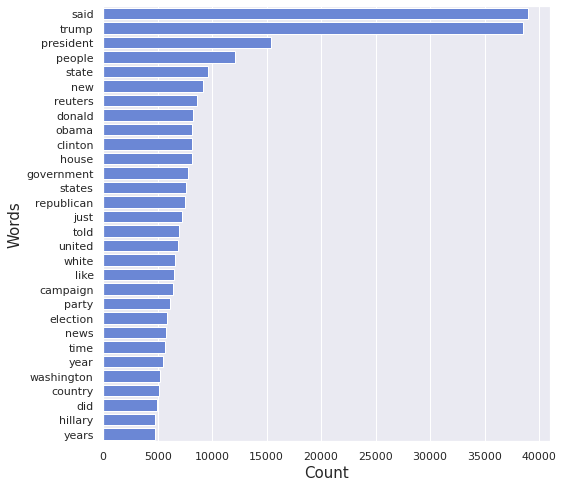

In [ ]:
# To summarize the above table in a barplot
# 'bow' stands for bag of words

plt.figure(figsize=(8,8))
df_bow_wc_data = df_bow_wc.sort_values(by = 'Word Count', ascending=False).iloc[0:30]
sns.barplot(x='Word Count', y='Word', data=df_bow_wc_data, color='#597FE7')
plt.xlabel('Count',fontsize = 15)
plt.ylabel('Words',fontsize = 15);

### 2. Vectorization using Bag of Words model and stemming


In [ ]:
%%time
# Instantiating the Vectorizer 
bow_stemming = CountVectorizer(min_df = 500, tokenizer = stemming_tokenizer)

# Fit and transform X_train
X_train_bow_stemmed = bow_stemming.fit_transform(X_train)

# Transform X_test
X_test_bow_stemmed = bow_stemming.transform(X_test)


CPU times: user 23min 20s, sys: 23 ms, total: 23min 20s
Wall time: 23min 20s


In [ ]:
# Transform the information into DataFrame for visualization
df_bow_stemming = pd.DataFrame(columns=bow_stemming.get_feature_names(), data=X_train_bow_stemmed.toarray())
df_bow_stemming.head()

,abl,absolut,accept,access,accord,account,accus,across,act,action,activ,activist,actual,ad,addit,address,administr,admit,advanc,advis,advoc,affair,affect,agenc,agenda,ago,agre,agreement,ahead,aid,aim,air,alleg,alli,allow,almost,along,alreadi,also,although,...,warn,watch,water,way,weapon,websit,wednesday,week,well,went,west,western,whether,white,whole,whose,wife,will,win,within,without,woman,women,wonder,word,work,worker,world,worri,would,wrong,wrote,year,yearold,yet,york,young,“i,“the,“we
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,...,0,0,0,1,0,0,2,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2,1,0,0,0
4,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Create new dataframe and count words after tokenizing
df_bow_stem_wc = pd.DataFrame(df_bow_stemming.sum(axis = 0).reset_index())

# Rename column from Word to Word Count
df_bow_stem_wc.columns = ['Word', 'Word Count']

# Reset index
df_bow_stem_wc.reset_index(inplace = True, drop = True)

# Return top 30 words in dataframe
df_bow_stem_wc.sort_values(by = 'Word Count', ascending = False).head(30)

,Word,Word Count
822,us,18512
871,would,16046
560,peopl,12086
536,one,10512
686,say,10470
874,year,9807
38,also,9032
206,democrat,8141
653,report,7845
511,nation,7840


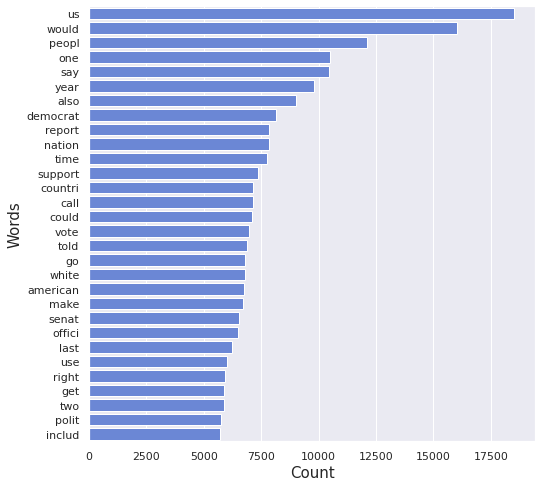

In [ ]:
# To summarize the above table in a barplot
# 'bow' stands for bag of words

plt.figure(figsize=(8,8))
df_bow_stem_wc_data = df_bow_stem_wc.sort_values(by = 'Word Count', ascending=False).iloc[0:30]
sns.barplot(x='Word Count', y='Word', data=df_bow_stem_wc_data, color='#597FE7')
plt.xlabel('Count',fontsize = 15)
plt.ylabel('Words',fontsize = 15);

### 3. Vectorization using Bag of Words model and lemmatization

In [ ]:
%%time
# Instantiating the Vectorizer 
bow_lemmatization = CountVectorizer(min_df = 500, tokenizer = lemmatization_tokenizer)

# Fit and Transform X_train
X_train_bow_lemmatization = bow_lemmatization.fit_transform(X_train)

# Transform X_test
X_test_bow_lemmatization = bow_lemmatization.transform(X_test)


CPU times: user 22min 12s, sys: 2.33 s, total: 22min 14s
Wall time: 22min 14s


In [ ]:
# Transform the information into DataFrame for visualization
df_bow_lemmatization = pd.DataFrame(columns=bow_lemmatization.get_feature_names(), data=X_train_bow_lemmatization.toarray())
df_bow_lemmatization.head()

,ability,able,absolutely,accept,access,according,account,accusation,accused,across,act,action,activist,activity,actually,add,added,adding,additional,address,administration,adviser,affair,agency,agenda,agent,ago,agree,agreed,agreement,ahead,aid,aide,aimed,air,al,allegation,alleged,allow,allowed,...,website,wednesday,week,weekend,well,went,west,western,whether,white,whole,whose,wife,willing,win,wire,within,without,woman,word,work,worked,worker,working,world,worse,worst,worth,would,wrong,wrote,year,yearold,yes,yet,york,young,“i,“the,“we
0,0,0,0,0,1,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,1,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,4,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,0,0,2,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,4,0,0,4,0,0,0,0,0,0,0,0


In [ ]:
# Create new dataframe and count words after tokenizing
df_bow_lemm_wc = pd.DataFrame(df_bow_lemmatization.sum(axis = 0).reset_index())

# Rename column from Word to Word Count
df_bow_lemm_wc.columns = ['Word', 'Word Count']

# Reset index
df_bow_lemm_wc.reset_index(inplace = True, drop = True)

# Return top 30 words in dataframe
df_bow_lemm_wc.sort_values(by = 'Word Count', ascending = False).head(30)

,Word,Word Count
1043,u,24597
1110,would,21297
705,people,15867
675,one,14025
1113,year,13147
45,also,11866
1013,time,10245
864,say,9844
229,country,9404
227,could,9347


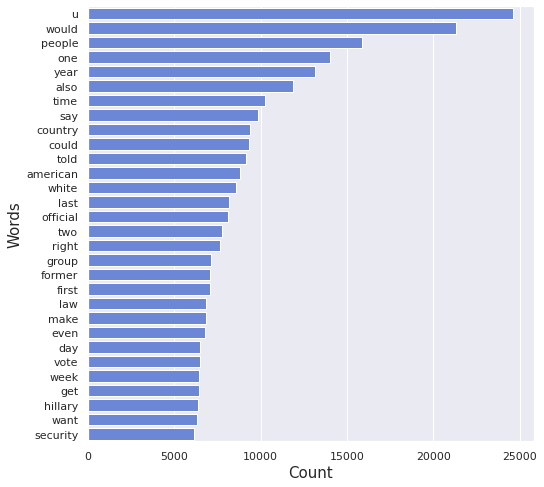

In [ ]:
# To summarize the above table in a barplot
# 'bow' stands for bag of words

plt.figure(figsize=(8,8))
df_bow_lemm_wc_data = df_bow_lemm_wc.sort_values(by = 'Word Count', ascending=False).iloc[0:30]
sns.barplot(x='Word Count', y='Word', data=df_bow_lemm_wc_data, color='#597FE7')
plt.xlabel('Count',fontsize = 15)
plt.ylabel('Words',fontsize = 15);

###Summarizing Bag of Words Model

In [ ]:
# Summarizing all tables with the list of words generated from Bag of Words Model
# Create new table with reset index and showed only the top 30 words
#display(df_bow_wc, df_bow_stem_wc, df_bow_lemm_wc)

## TF-IDF Model (Term Frequency - Inverse Document Frequency)

- Vectorization using the TF-IDF model:
    - Using only removing stopwords and keeping a min_df
    - Using Stemming techniques
    - Using Lemmatization techniques 

###1. Vectorization using TD-IDF and Stopwords
**Use min_df=500 and stopwords=english with a TF-IDF Vectorizer**

In [ ]:
%%time
# Create model
tfidf_vectorizer = TfidfVectorizer(min_df = 500, stop_words = 'english')

# Fit and transform data for X_train
X_train_tfidf_vectorizer = tfidf_vectorizer.fit_transform(X_train)

# Transform data for test
X_test_tfidf_vectorizer = tfidf_vectorizer.transform(X_test)


CPU times: user 6.06 s, sys: 42.4 ms, total: 6.1 s
Wall time: 6.11 s


In [ ]:
# Transform the information into DataFrame for visualization
df_tfidf = pd.DataFrame(columns=tfidf_vectorizer.get_feature_names(), data=X_train_tfidf_vectorizer.toarray())
df_tfidf.head()

,ability,able,absolutely,accept,access,according,account,accused,act,action,actions,actually,added,adding,additional,address,administration,adviser,affairs,agencies,agency,agenda,ago,agree,agreed,agreement,ahead,aimed,air,allegations,alleged,allies,allow,allowed,allowing,ally,ambassador,america,american,americans,...,water,way,ways,weapons,website,wednesday,week,weekend,weeks,went,west,western,white,wife,willing,win,winning,wire,woman,women,won,word,words,work,worked,workers,working,world,worse,worst,worth,wouldn,wrong,wrote,year,yearold,years,yes,york,young
0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.075742,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.059706,0.057337,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.078865,0.142807,0.0,0.0,0.105600,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.085782,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.00000,0.0,0.0,0.095754,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.074153,0.0,0.0,0.000000,0.0,0.0,0.0,0.068777,0.0,0.069549,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.055888,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.043991,0.000000,0.0,0.0,0.0,0.0,0.0,0.061652,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.14566,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.068374,0.063949,0.0,0.0,0.078003,0.0,0.094891,0.045564,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.125875,0.071746,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.068168,0.0,0.000000,0.096529,0.0,0.0,0.0,0.0,0.000000,0.000000,0.040864,0.0,0.0,0.0,0.0,0.066690
4,0.0,0.0,0.00000,0.0,0.0,0.036490,0.057815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.037913,0.000000,0.000000,...,0.0,0.035855,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.045342,0.0,0.0,0.033528,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.046076,0.000000,0.0,0.0,0.0,0.0,0.111299,0.099687,0.000000,0.0,0.0,0.0,0.0,0.053291


In [ ]:
# Create new dataframe and count words after tokenizing
df_tfidf_wc = pd.DataFrame(df_tfidf.sum(axis = 0).reset_index())

# Rename column from Word to Word Count
df_tfidf_wc.columns = ['Word', 'Word Weight']

# Reset index
df_tfidf_wc.reset_index(inplace = True, drop = True)

# Return top 30 words in dataframe
df_tfidf_wc.sort_values(by = 'Word Weight', ascending = False).head(30)

,Word,Word Weight
979,trump,1592.942251
824,said,1279.641765
699,president,679.771897
665,people,557.658184
167,clinton,505.242823
907,state,483.254572
627,obama,480.861326
803,reuters,469.857143
426,house,456.241874
613,new,440.352512


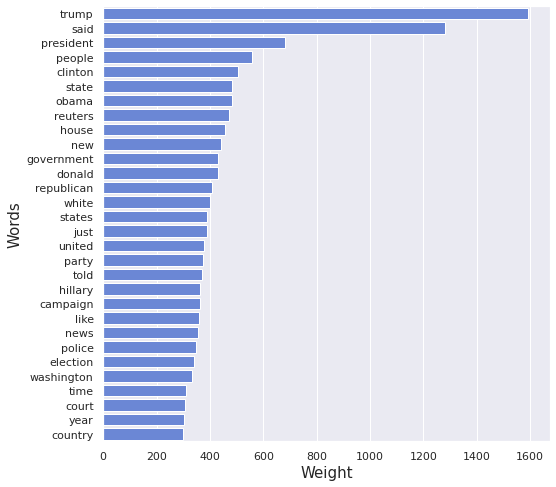

In [ ]:
# To summarize the above table in a barplot

plt.figure(figsize=(8,8))
df_tfidf_wc_data = df_tfidf_wc.sort_values(by = 'Word Weight', ascending=False).iloc[0:30]
sns.barplot(x='Word Weight', y='Word', data=df_tfidf_wc_data, color='#597FE7')
plt.xlabel('Weight',fontsize = 15)
plt.ylabel('Words',fontsize = 15);

###2. Vectorization using TF-IDF model and stemming

In [ ]:
%%time
# Instantiating the Vectorizer 
tfidf_stemming = TfidfVectorizer(min_df = 500, tokenizer = stemming_tokenizer)

# Fit and transform X_train
X_train_tfidf_stemmed = tfidf_stemming.fit_transform(X_train)

# Transform X_test
X_test_tfidf_stemmed = tfidf_stemming.transform(X_test)

CPU times: user 23min 20s, sys: 2.36 s, total: 23min 22s
Wall time: 23min 22s


In [ ]:
# Transform the information into DataFrame for visualization
df_tfidf_stemming = pd.DataFrame(columns=tfidf_stemming.get_feature_names(), data=X_train_tfidf_stemmed.toarray())
df_tfidf_stemming.head()

,abl,absolut,accept,access,accord,account,accus,across,act,action,activ,activist,actual,ad,addit,address,administr,admit,advanc,advis,advoc,affair,affect,agenc,agenda,ago,agre,agreement,ahead,aid,aim,air,alleg,alli,allow,almost,along,alreadi,also,although,...,warn,watch,water,way,weapon,websit,wednesday,week,well,went,west,western,whether,white,whole,whose,wife,will,win,within,without,woman,women,wonder,word,work,worker,world,worri,would,wrong,wrote,year,yearold,yet,york,young,“i,“the,“we
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.169291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.112648,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.168425,0.000000,0.0000,0.000000,0.0,0.000000,0.178904,0.145222,0.0,0.0,0.0,0.256221,0.189514,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.222909,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.120139,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.080435,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.064619,0.057383,0.061999,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.072649,0.0,0.0,0.064705,0.053653,0.0,0.065068,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.046271,0.0,0.000000,0.103506,0.043564,0.0000,0.000000,0.0,0.152413,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.061442,0.0,0.0,0.000000,0.067976,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.079081,0.0,0.0,0.0,0.0,0.074246,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.082862,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.118039,0.0,0.000000,0.000000,0.000000,0.0000,0.155803,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.055379,0.0,0.0,0.0,0.000000,0.0,0.0,0.045598,0.000000,0.0,0.146889,0.090152,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.065973,0.089310,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07955,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.104121,0.000000,0.000000,0.1374,0.084412,0.0,0.000000,0.000000,0.061674,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0


In [ ]:
# Create new dataframe and count words after tokenizing
df_tfidf_stem_wc = pd.DataFrame(df_tfidf_stemming.sum(axis = 0).reset_index())

# Rename column from Word to Word Count
df_tfidf_stem_wc.columns = ['Word', 'Word Weight']

# Reset index
df_tfidf_stem_wc.reset_index(inplace = True, drop = True)

# Return top 30 words in dataframe
df_tfidf_stem_wc.sort_values(by = 'Word Weight', ascending = False).head(30)

,Word,Word Weight
822,us,580.119621
871,would,482.228785
560,peopl,418.438544
686,say,360.939199
536,one,351.438003
206,democrat,342.804961
874,year,338.795448
653,report,330.764948
835,vote,327.569174
697,senat,324.272818


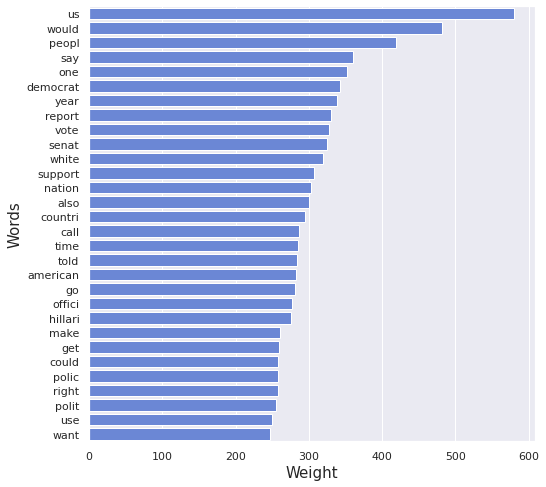

In [ ]:
# To summarize the above table in a barplot

plt.figure(figsize=(8,8))
df_tfidf_stem_wc_data = df_tfidf_stem_wc.sort_values(by = 'Word Weight', ascending=False).iloc[0:30]
sns.barplot(x='Word Weight', y='Word', data=df_tfidf_stem_wc_data, color='#597FE7')
plt.xlabel('Weight',fontsize = 15)
plt.ylabel('Words',fontsize = 15);

### 3. Vectorization using TF-IDF model and lemmatization

In [ ]:
%%time
# Instantiating the Vectorizer 
tfidf_lemmatization = TfidfVectorizer(min_df = 500, tokenizer = lemmatization_tokenizer)

# Fit and transform X_train
X_train_tfidf_lemmatization = tfidf_lemmatization.fit_transform(X_train)

# Transform X_test
X_test_tfidf_lemmatization = tfidf_lemmatization.transform(X_test)

CPU times: user 22min 57s, sys: 2.27 s, total: 23min
Wall time: 23min


In [ ]:
# Transform the information into DataFrame for visualization
df_tfidf_lemmatization = pd.DataFrame(columns=tfidf_lemmatization.get_feature_names(), data=X_train_tfidf_lemmatization.toarray())
df_tfidf_lemmatization.head()

,ability,able,absolutely,accept,access,according,account,accusation,accused,across,act,action,activist,activity,actually,add,added,adding,additional,address,administration,adviser,affair,agency,agenda,agent,ago,agree,agreed,agreement,ahead,aid,aide,aimed,air,allegation,alleged,allow,allowed,allowing,...,wednesday,week,weekend,well,went,west,western,whether,white,whole,whose,wife,willing,win,winning,wire,within,without,woman,word,work,worked,worker,working,world,worse,worst,worth,would,wrong,wrote,year,yearold,yes,yet,york,young,“i,“the,“we
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.076027,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.05171,0.0,0.058265,0.143074,0.0,0.0,0.000000,0.105449,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.085916,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.073334,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043121,0.0,0.0,0.000000,0.0,0.0,0.0,0.052745,0.0,0.0,0.0,0.05322,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.033597,0.057139,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.042047,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.04524,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.121060,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.136177,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.05935,0.0,0.0,...,0.0,0.00000,0.0,0.042908,0.000000,0.0,0.0,0.047416,0.116484,0.000000,0.058609,0.065831,0.0,0.0,0.0,0.0,0.0,0.048497,0.000000,0.0,0.0,0.063271,0.0,0.000000,0.091186,0.0,0.0,0.0,0.079677,0.000000,0.000000,0.031062,0.0,0.0,0.00000,0.0,0.061882,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.036025,0.051785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.00000,0.0,0.000000,0.044787,0.0,0.0,0.000000,0.033010,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.045498,0.000000,0.0,0.0,0.0,0.022579,0.110786,0.098384,0.000000,0.0,0.0,0.00000,0.0,0.052608,0.0,0.0,0.0


In [ ]:
# Create new dataframe and count words after tokenizing
df_tfidf_lemm_wc = pd.DataFrame(df_tfidf_lemmatization.sum(axis = 0).reset_index())

# Rename column from Word to Word Count
df_tfidf_lemm_wc.columns = ['Word', 'Word Weight']

# Reset index
df_tfidf_lemm_wc.reset_index(inplace = True, drop = True)

# Return top 30 words in dataframe
df_tfidf_lemm_wc.sort_values(by = 'Word Weight', ascending = False).head(30)

,Word,Word Weight
1049,u,735.454904
1117,would,615.235882
711,people,534.542617
682,one,444.590260
1120,year,431.888826
1097,white,407.121840
45,also,380.215867
872,say,368.506864
1019,time,368.433742
231,country,363.947052


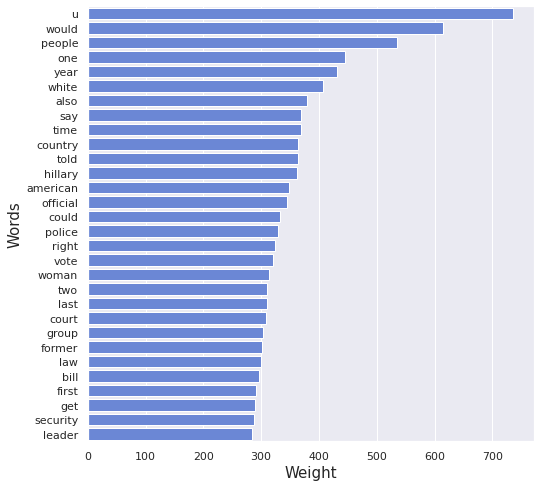

In [ ]:
# To summarize the above table in a barplot

plt.figure(figsize=(8,8))
df_tfidf_lemm_wc_data = df_tfidf_lemm_wc.sort_values(by = 'Word Weight', ascending=False).iloc[0:30]
sns.barplot(x='Word Weight', y='Word', data=df_tfidf_lemm_wc_data, color='#597FE7')
plt.xlabel('Weight',fontsize = 15)
plt.ylabel('Words',fontsize = 15);

###Summarizing TF-IDF Model

##Extend the list of stopwords

In [ ]:
# recall the list of stopwords I have created previously
print(stopwordslist)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# check the size of the original stopwords list
print("The length of list is: ", len(stopwordslist))

The length of list is:  203


In [ ]:
# Extend the stopwords list after vectorization
stopwordslist.extend(('say','obama','(reuters)','govern','news','united', 'states', '-', 'said', 'arent', 'couldnt',
                        'didnt', 'doesnt', 'dont', 'hadnt', 'hasnt', 'havent','isnt', 'mightnt', 'mustnt', 'neednt',
                        'shant', 'shes', 'shouldnt', 'shouldve','thatll', 'wasnt', 'werent', 'wont', 'wouldnt',
                        'youd','youll', 'youre', 'youve', 'trump', 'democrat', 'white', 'black', 'reuter', 'monday',
                        'tuesday','wednesday','thursday', 'friday','saturday','sunday'))

In [ ]:
# check the list of stopwords
print(stopwordslist)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# check the size of the new stopwords list
print("The length of list is: ", len(stopwordslist))

The length of list is:  249


## Vectorization using TF-IDF model with ngram_range and lemmatization

[This](https://www.kaggle.com/c/avito-demand-prediction/discussion/58819) article would be helpful in understanding the parameter ngram_range.

I also followed these articles to understand how to create models for analysis

https://www.kaggle.com/manueldiaz/simple-linear-model-with-tfidf

https://stackoverflow.com/questions/54097067/tf-idf-multiple-regression-prediction-problem

In [ ]:
%%time
# Create model objects:
# Create features
X = concat_tf['text']

# Create targets
y = concat_tf['category']

# Create train_test_split model - 60% training, 40% testing - this is to avoid overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42, stratify = y)

# Vectorize data using a TFIDFVectorizer
tfidf_model = TfidfVectorizer(min_df = 500, ngram_range = (1,2), tokenizer = lemmatization_tokenizer)

# Fit training data
tfidf_model.fit(X_train)

# Transform training data
# This 
X_train = tfidf_model.transform(X_train)

# Tranform testing data
X_test = tfidf_model.transform(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


CPU times: user 33min 16s, sys: 2.59 s, total: 33min 19s
Wall time: 33min 19s


In [ ]:
# Transform the information into DataFrame for visualization
df_tfidf_model = pd.DataFrame(columns=tfidf_model.get_feature_names(), data=X_train.toarray())
df_tfidf_model.head()

,ability,able,absolutely,access,according,account,accused,across,act,action,activist,activity,actually,added,adding,address,administration,adviser,affair,agency,agenda,ago,agreed,agreement,ahead,aide,air,allegation,alleged,allow,allowed,ally,almost,along,already,also,although,always,america,american,...,war,warned,watch,way,weapon,website,wednesday,week,well,went,west,western,whether,white,whole,whose,wife,win,wire,within,without,woman,word,work,worked,worker,working,world,would,wrong,wrote,year,year ago,yearold,yet,york,young,“i,“the,“we
0,0.0,0.049249,0.0,0.055484,0.036722,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.054957,0.000000,0.0,0.0,0.087034,0.0,0.048704,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.087675,0.000000,0.0,0.107005,0.0,0.032552,...,0.000000,0.0,0.0,0.034617,0.000000,0.000000,0.079017,0.032857,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.050265,0.0,0.0,0.000000,0.050236,0.0,0.0,0.0,0.077426,0.0,0.166764,0.0,0.000000,0.023219,0.0,0.0,0.053886,0.000000,0.050891,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.059719,0.0,0.000000,0.000000,0.0,0.0,0.114019,0.0,0.105708,0.210154,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.053157,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.274112,0.000000,0.079683,0.091591,0.0,0.0,0.000000,0.049956,0.000000,0.0,0.000000,0.0,0.0,0.287818,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.056311,0.0,0.0,0.032671,0.000000,0.000000,0.055417,0.052275,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.098915,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.104656,0.000000,0.0,0.00000,0.0,0.089031,0.053303,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.070305,0.110896,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.112897,0.0,0.000000,0.047157,0.0,0.0,0.054720,0.119377,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.029043,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.201054,0.0,0.0,0.000000,0.039506,0.0,0.07613,0.0,0.000000,0.038914,0.0,0.000000,0.0,0.000000,...,0.032553,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.027999,0.0,0.0,0.042974,0.061084,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.029241,0.017214,0.0,0.0,0.039949,0.000000,0.000000,0.033881,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.091853,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.074542,0.0,0.0,0.000000,0.000000,0.066572,0.0,0.000000,0.0,0.0,0.000000,0.099154,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [ ]:
df_tfidf_model.shape

(13122, 842)

In [ ]:
# Create new dataframe and count words after tokenizing
df_tfidf_model_wc = pd.DataFrame(df_tfidf_model.sum(axis = 0).reset_index())

# Rename column from Word to Word Count
df_tfidf_model_wc.columns = ['Word', 'Word Weight']

# Reset index
df_tfidf_model_wc.reset_index(inplace = True, drop = True)

# Return top 30 words in dataframe
df_tfidf_model_wc.sort_values(by = 'Word Weight', ascending = False).head(30)

,Word,Word Weight
778,u,618.650529
830,would,518.318781
530,people,445.751342
507,one,367.951915
833,year,361.213895
815,white,338.787952
35,also,316.654446
753,time,306.089521
643,say,304.266308
756,told,302.879894


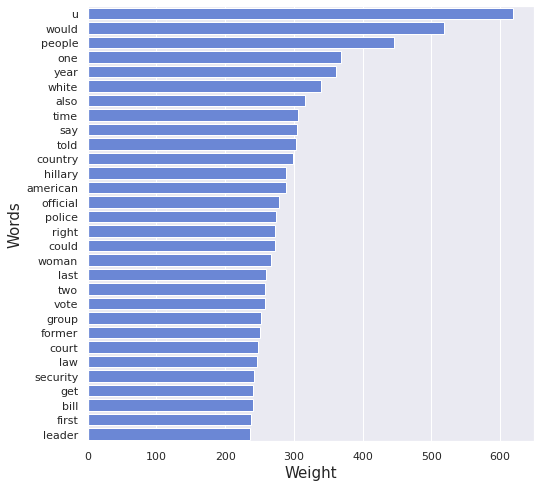

In [ ]:
# To summarize the above table in a barplot

plt.figure(figsize=(8,8))
df_tfidf_model_wc_data = df_tfidf_model_wc.sort_values(by = 'Word Weight', ascending=False).iloc[0:30]
sns.barplot(x='Word Weight', y='Word', data=df_tfidf_model_wc_data, color='#597FE7')
plt.xlabel('Weight',fontsize = 15)
plt.ylabel('Words',fontsize = 15);

#Data Modelling

At this stage I want to explore Machine Learning models would work best to identify True and Fake new

The following models will be used for data modelling:

**Supervised machine learning:**
1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier
4. K Nearest Neighbors 
5. Naive Bayes Classifier

**Neural Network:**
1. Multiple Layer Perceptron (MLP) Classifier
2. MLP with Keras (in progress)

Each model is summarized with the following:
1. Classification Report
2. Accuracy Score
3. Confusion Matrix

**Classification Report**
- Precision: What percent of your prediction were correct?
- Recall: What percent of the positive cases did you catch?
- F1 socre: What percent of positive predictions were correct?
- Support:  The number of actual occurances of the class in the specificed dataset


## Supervised Machine Learning:

###1. Logistic Regression

In [ ]:
%%time

# Create Logistic Model object
reg = LogisticRegression(solver = 'lbfgs', verbose = 1, n_jobs = -1)
                              
# Fit data into the model
reg.fit(X_train, y_train)

# Predict data
reg_prediction = reg.predict(X_test)

# Return score for Train model
reg.score(X_train, y_train)

# Scoring the model on test data
reg.score(X_test, y_test)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.


CPU times: user 168 ms, sys: 4.73 s, total: 4.89 s
Wall time: 5.44 s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.2s finished


In [ ]:
# Print algorithm score
print(f'Logistic Regression training score is: {reg.score(X_train, y_train)}')
print('\n') # printing a blank line
print(f'Logistic Regression testing score is: {reg.score(X_test, y_test)}')

Logistic Regression training score is: 0.9730986130163085


Logistic Regression testing score is: 0.9618198445358939


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      4467
           1       0.96      0.96      0.96      4281

    accuracy                           0.96      8748
   macro avg       0.96      0.96      0.96      8748
weighted avg       0.96      0.96      0.96      8748



Confusion Matrix:
        Predicted 0  Predicted 1
True 0         4286          181
True 1          153         4128


Accuracy Score:
0.9618198445358939




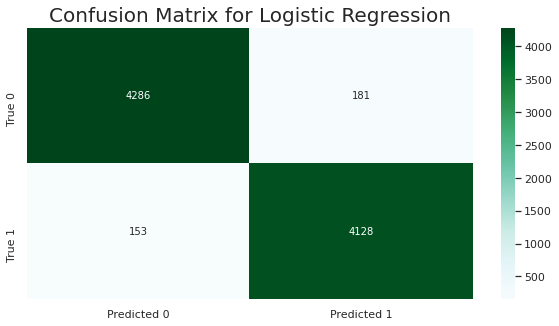

In [ ]:
# Set up confusion matrix 
reg_confusion_matrix = confusion_matrix(y_test,reg_prediction)

# Putting the confusion matrix in a DataFrame
reg_confusion_matrix = pd.DataFrame(data = reg_confusion_matrix, columns = ['Predicted 0', 'Predicted 1'], index = ['True 0','True 1'])

# Set up classification_report
reg_classification_report = classification_report(y_test, reg_prediction)

# Calculate accuracy_score
reg_accuracy_score = accuracy_score(y_test, reg_prediction)

# Printing confusion matrix in DataFrame
print('Logistic Regression Classification Report:')
print(reg_classification_report)
print('\n')
print('Confusion Matrix:')
print(reg_confusion_matrix)
print('\n')
print("Accuracy Score:")
print (reg_accuracy_score)
print('\n')

# Visualizing the heatmap
plt.figure(figsize = (10,5))
plt.title('Confusion Matrix for Logistic Regression', fontsize = 20)
sns.heatmap(reg_confusion_matrix, annot = True, cmap='BuGn', fmt = 'g')
plt.show()

###2. Decision Tree Classifier

In [ ]:
%%time

# Create Decision Tree Classifier Model object
dt_classifier = DecisionTreeClassifier(max_depth = 5)
                              
# Fit data into the model
dt_classifier.fit(X_train, y_train)

# Predict data
dt_prediction = dt_classifier.predict(X_test)

# Return score for Train model
dt_classifier.score(X_train, y_train)

# Scoring the model on test data
dt_classifier.score(X_test, y_test)


CPU times: user 563 ms, sys: 6.99 ms, total: 570 ms
Wall time: 570 ms


In [ ]:
# Print algorithm score
print(f'Decision Tres Classifier training score is: {dt_classifier.score(X_train, y_train)}')
print('\n') # printing a blank line
print(f'Decision Tree Classifier testing score is: {dt_classifier.score(X_test, y_test)}')

Decision Tres Classifier training score is: 0.8029263831732968


Decision Tree Classifier testing score is: 0.7957247370827618


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.65      0.77      4467
           1       0.72      0.94      0.82      4281

    accuracy                           0.80      8748
   macro avg       0.82      0.80      0.79      8748
weighted avg       0.83      0.80      0.79      8748



Confusion Matrix:
        Predicted 0  Predicted 1
True 0         2916         1551
True 1          236         4045


Accuracy Score:
0.7957247370827618




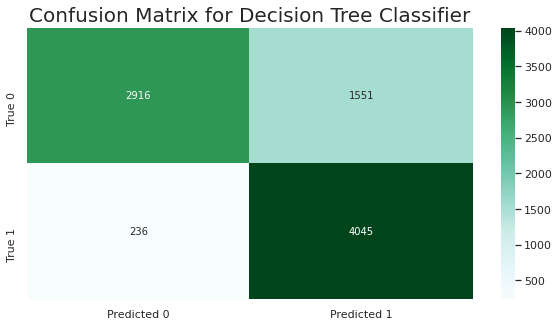

In [ ]:
# Set up confusion matrix 
dt_classifier_confusion_matrix = confusion_matrix(y_test,dt_prediction)

# Putting the confusion matrix in a DataFrame
dt_classifier_confusion_matrix = pd.DataFrame(data = dt_classifier_confusion_matrix, columns = ['Predicted 0', 'Predicted 1'], index = ['True 0','True 1'])

# Set up classification_report
dt_classifer_report = classification_report(y_test, dt_prediction)

# Calculate accuracy_score
dt_accuracy_score = accuracy_score(y_test, dt_prediction)

# Printing confusion matrix in DataFrame
print('Decision Tree Classification Report:')
print(dt_classifer_report)
print('\n')
print('Confusion Matrix:')
print(dt_classifier_confusion_matrix)
print('\n')
print("Accuracy Score:")
print (dt_accuracy_score)
print('\n')

# Visualizing the heatmap
plt.figure(figsize = (10,5))
plt.title('Confusion Matrix for Decision Tree Classifier', fontsize = 20)
sns.heatmap(dt_classifier_confusion_matrix, annot = True, cmap='BuGn', fmt = 'g')
plt.show()

In [ ]:
#tree.plot_tree(dt_classifier);

###3. Random Forest Classifier

In [ ]:
%%time

# Create Random Forest Model object
rf_classifier = RandomForestClassifier(max_depth = 5, n_jobs = -1)
                              
# Fit data into the model
rf_classifier.fit(X_train, y_train)

# Predict data
rf_prediction = rf_classifier.predict(X_test)

# Return score for Train model
rf_classifier.score(X_train, y_train)

# Scoring the model on test data
rf_classifier.score(X_test, y_test)

CPU times: user 2.8 s, sys: 242 ms, total: 3.04 s
Wall time: 718 ms


In [ ]:
# Print algorithm score
print(f'Random Forest classifier training score is: {rf_classifier.score(X_train, y_train)}')
print('\n') # printing a blank line
print(f'Random Forest classifier score is: {rf_classifier.score(X_test, y_test)}')

Random Forest classifier training score is: 0.9412437128486512


Random Forest classifier score is: 0.9276406035665294


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      4467
           1       0.91      0.95      0.93      4281

    accuracy                           0.93      8748
   macro avg       0.93      0.93      0.93      8748
weighted avg       0.93      0.93      0.93      8748



Confusion Matrix:
        Predicted 0  Predicted 1
True 0         4063          404
True 1          229         4052


Accuracy Score:
0.9276406035665294




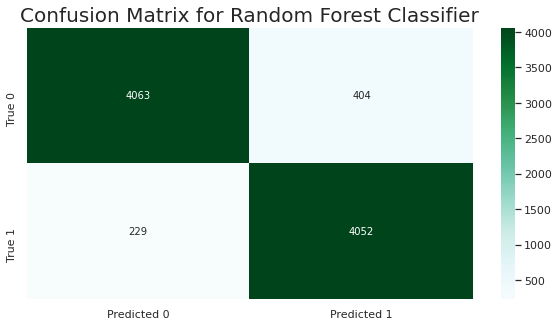

In [ ]:
# Set up confusion matrix 
rf_classifier_confusion_matrix = confusion_matrix(y_test,rf_prediction)

# Putting the confusion matrix in a DataFrame
rf_classifier_confusion_matrix = pd.DataFrame(data = rf_classifier_confusion_matrix, columns = ['Predicted 0', 'Predicted 1'], index = ['True 0','True 1'])

# Set up classification_report
rf_classifer_report = classification_report(y_test, rf_prediction)

# Calculate accuracy_score
rf_accuracy_score = accuracy_score(y_test, rf_prediction)

# Printing confusion matrix in DataFrame
print('Random Forest Classification Report:')
print(rf_classifer_report)
print('\n')
print('Confusion Matrix:')
print(rf_classifier_confusion_matrix)
print('\n')
print("Accuracy Score:")
print (rf_accuracy_score)
print('\n')

# Visualizing the heatmap
plt.figure(figsize = (10,5))
plt.title('Confusion Matrix for Random Forest Classifier', fontsize = 20)
sns.heatmap(rf_classifier_confusion_matrix, annot = True, cmap='BuGn', fmt = 'g')
plt.show()

### 4. K Nearest Neighbour (KNN)

**Set up Standard Scaler**

Before using KNN, data is required to be scaled for standardization before modelling, therefore I will use this to fit into model:
- `X_train_scaled`
- `X_test_scaled`

In [ ]:
# Applying PCA to the orignial k-dimensional data set
# Instantiating the Scaler
scaler = StandardScaler(with_mean = False)

# Fitting the Model
scaler.fit(X_train)

# Transforming the training set 
X_train_scaled = scaler.transform(X_train)

# Transforming the test set 
X_test_scaled = scaler.transform(X_test)

In [ ]:
%%time

# Create KNN Model object
knn = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1)
                              
# Fit data into the model
knn.fit(X_train_scaled, y_train)

# Predict data
knn_prediction = knn.predict(X_test_scaled)

# Return score for Train model
knn.score(X_train_scaled, y_train)

# Scoring the model on test data
knn.score(X_test_scaled, y_test)


CPU times: user 1min 2s, sys: 11.1 s, total: 1min 13s
Wall time: 9.44 s


In [ ]:
# Print algorithm score
print(f'K Nearest Neighbour training score is: {knn.score(X_train_scaled, y_train)}')
print('\n') # printing a blank line
print(f'K Nearest Neighbour score is: {knn.score(X_test_scaled, y_test)}')

K Nearest Neighbour training score is: 0.9094807780670853


K Nearest Neighbour score is: 0.8225361819434872


K Nearest Neighbour Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      4445
           1       0.79      0.86      0.83      4261

    accuracy                           0.82      8706
   macro avg       0.82      0.82      0.82      8706
weighted avg       0.82      0.82      0.82      8706



Confusion Matrix:
        Predicted 0  Predicted 1
True 0         3496          949
True 1          596         3665


Accuracy Score:
0.8225361819434872




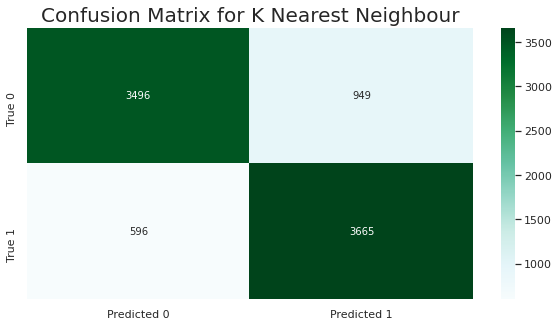

In [ ]:
# Set up confusion matrix 
knn_confusion_matrix = confusion_matrix(y_test,knn_prediction)

# Putting the confusion matrix in a DataFrame
knn_confusion_matrix = pd.DataFrame(data = knn_confusion_matrix, columns = ['Predicted 0', 'Predicted 1'], index = ['True 0','True 1'])

# Set up classification_report
knn_report = classification_report(y_test, knn_prediction)

# Calculate accuracy_score
knn_accuracy_score = accuracy_score(y_test, knn_prediction)

# Printing confusion matrix in DataFrame
print('K Nearest Neighbour Classification Report:')
print(knn_report)
print('\n')
print('Confusion Matrix:')
print(knn_confusion_matrix)
print('\n')
print("Accuracy Score:")
print (knn_accuracy_score)
print('\n')

# Visualizing the heatmap
plt.figure(figsize = (10,5))
plt.title('Confusion Matrix for K Nearest Neighbour', fontsize = 20)
sns.heatmap(knn_confusion_matrix, annot = True, cmap='BuGn', fmt = 'g')
plt.show()

###5. Naive Bayes Classifier

[This](https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c) article descibes the different types of Naive Bayes model

In [ ]:
%%time

# Create Naive Bayes Model object
nb = MultinomialNB()
                              
# Fit data into the model
nb.fit(X_train, y_train)

# Predict data
nb_prediction = nb.predict(X_test)

# Return score for Train model
nb.score(X_train, y_train)

# Scoring the model on test data
nb.score(X_test, y_test)

CPU times: user 20.7 ms, sys: 995 µs, total: 21.7 ms
Wall time: 21.2 ms


In [ ]:
# Print algorithm score
print(f'Multinomial Naive Bayes training score is: {nb.score(X_train, y_train)}')
print('\n') # printing a blank line
print(f'Multinomial Naive Bayes score is: {nb.score(X_test, y_test)}')

Multinomial Naive Bayes training score is: 0.9344612101813747


Multinomial Naive Bayes score is: 0.9324417009602195


Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      4467
           1       0.92      0.95      0.93      4281

    accuracy                           0.93      8748
   macro avg       0.93      0.93      0.93      8748
weighted avg       0.93      0.93      0.93      8748



Confusion Matrix:
        Predicted 0  Predicted 1
True 0         4106          361
True 1          230         4051


Accuracy Score:
0.9324417009602195




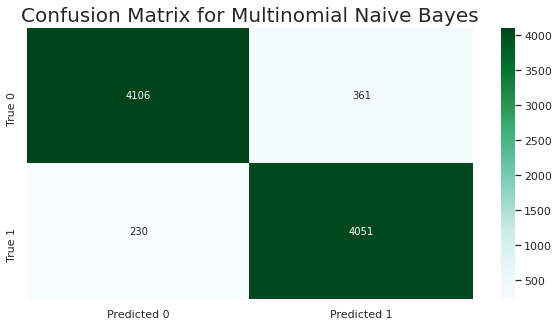

In [ ]:
# Set up confusion matrix 
nb_confusion_matrix = confusion_matrix(y_test,nb_prediction)

# Putting the confusion matrix in a DataFrame
nb_confusion_matrix = pd.DataFrame(data = nb_confusion_matrix, columns = ['Predicted 0', 'Predicted 1'], index = ['True 0','True 1'])

# Set up classification_report
nb_classifer_report = classification_report(y_test, nb_prediction)

# Calculate accuracy_score
nb_accuracy_score = accuracy_score(y_test, nb_prediction)

# Printing confusion matrix in DataFrame
print('Multinomial Naive Bayes Classification Report:')
print(nb_classifer_report)
print('\n')
print('Confusion Matrix:')
print(nb_confusion_matrix)
print('\n')
print("Accuracy Score:")
print (nb_accuracy_score)
print('\n')

# Visualizing the heatmap
plt.figure(figsize = (10,5))
plt.title('Confusion Matrix for Multinomial Naive Bayes', fontsize = 20)
sns.heatmap(nb_confusion_matrix, annot = True, cmap='BuGn', fmt = 'g')
plt.show()

## Neural Network

In this section I will be working on neural network modelling using Keras. In order to proceed with neural network, the data requies re-scale, and the train_text_split needs to be rejusted.

Normalizing and standardizing data: 

https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/

https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

Here to perform nerual network modelling, I will make the following adjustment:
- `Train set to 90%, Test set to 10%`
- `MinMaxScaler`

### 1. Neural network models - Classification (Scikit-learn)

In [ ]:
# import library
from sklearn.neural_network import MLPClassifier

In [ ]:
%%time

# Create Neural Network object
nn_classification = MLPClassifier(solver='lbfgs', random_state=42)
                              
# Fit data into the model
nn_classification.fit(X_train, y_train)

# Predict data
nn_prediction = nn_classification.predict(X_test)

# Return score for Train model
nn_classification.score(X_train, y_train)

# Scoring the model on test data
nn_classification.score(X_test, y_test)


CPU times: user 2min 47s, sys: 13min 50s, total: 16min 38s
Wall time: 28.5 s


In [ ]:
# Print algorithm score
print(f'MLP Classifier training score is: {nn_classification.score(X_train, y_train)}')
print('\n') # printing a blank line
print(f'MLP Classifier score is: {nn_classification.score(X_test, y_test)}')

MLP Classifier training score is: 1.0


MLP Classifier score is: 0.9603337905807041


MLP Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      4467
           1       0.96      0.95      0.96      4281

    accuracy                           0.96      8748
   macro avg       0.96      0.96      0.96      8748
weighted avg       0.96      0.96      0.96      8748



Confusion Matrix:
        Predicted 0  Predicted 1
True 0         4317          150
True 1          197         4084


Accuracy Score:
0.9603337905807041




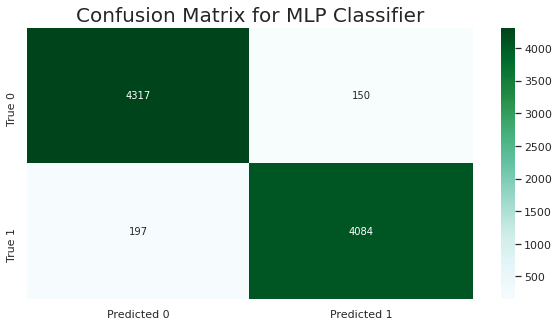

In [ ]:
# Set up confusion matrix 
nn_confusion_matrix = confusion_matrix(y_test,nn_prediction)

# Putting the confusion matrix in a DataFrame
nn_confusion_matrix = pd.DataFrame(data = nn_confusion_matrix, columns = ['Predicted 0', 'Predicted 1'], index = ['True 0','True 1'])

# Set up classification_report
nn_classifer_report = classification_report(y_test, nn_prediction)

# Calculate accuracy_score
nn_accuracy_score = accuracy_score(y_test, nn_prediction)

# Printing confusion matrix in DataFrame
print('MLP Classifier Classification Report:')
print(nn_classifer_report)
print('\n')
print('Confusion Matrix:')
print(nn_confusion_matrix)
print('\n')
print("Accuracy Score:")
print (nn_accuracy_score)
print('\n')

# Visualizing the heatmap
plt.figure(figsize = (10,5))
plt.title('Confusion Matrix for MLP Classifier', fontsize = 20)
sns.heatmap(nn_confusion_matrix, annot = True, cmap='BuGn', fmt = 'g')
plt.show()

### 2. Neural Network (Keras)

In [ ]:
%%time
# Create model objects:
# Create features
X_nn = concat_tf['text']

# Create targets
y_nn = concat_tf['category']

# Create train_test_split model - 60% training, 40% testing - this is to avoid overfitting
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_nn, test_size = 0.2, random_state = 42)

CPU times: user 7.41 ms, sys: 188 µs, total: 7.6 ms
Wall time: 7.12 ms


In [ ]:
%%time
# Vectorize data using a Count vectorize
cv_nn_model = CountVectorizer(min_df = 0, max_df = 1, ngram_range = (1,2))

# Fit and Transform training data 
X_train_review = cv_nn_model.fit_transform(X_train_nn)

# Tranform testing data
X_test_review = cv_nn_model.transform(X_test_nn)

CPU times: user 26 s, sys: 459 ms, total: 26.4 s
Wall time: 26.4 s


In [ ]:
print('cv_train shape:', X_train_review.shape)
print('cv_test shape:', X_test_review.shape)

cv_train shape: (17474, 1132495)
cv_test shape: (4369, 1132495)


In [ ]:
y_train_nn.shape

(17449,)

In [ ]:
#cv_nn_model = pd.DataFrame(columns=cv_nn_model.get_feature_names(), data=X_train_review.toarray())
#cv_nn_model.head()

In [ ]:
# could also consider use tokenizer from tensorflow
# import tensorflow as tf
# from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD

In [ ]:
# Here I performed a logistic regression model using Keras
# Define number of epochs
epochs = 5

#Standard fully connected network
K.clear_session()

model = Sequential()

#Add a dense layers and specify the sigmoid activation function
model.add(Dense(units = 100 , activation = 'relu', input_dim = X_train_review.shape[1]))
model.add(Dense(units = 50 , activation = 'relu'))
model.add(Dense(units = 25 , activation = 'relu'))
model.add(Dense(units = 10 , activation = 'relu'))
model.add(Dense(units = 1 , activation = 'sigmoid'))


In [ ]:
#compile model
#Use the SGD optimizer with a lr of 0.5, and use the binary cross entropy loss
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [ ]:
# fit into the model
model.fit(X_train_review, y_train_nn, epochs = 5)

Epoch 1/5


ValueError: ignored

### Analysis of trained model

## Summary

**Let's now take a look at all the training and testing scores for the above models:**

In [ ]:
# Evaluations of training scores
print('Evaluations of Training Models')
print(f'Logistic Regression:', reg.score(X_train, y_train)*100, "%")
print(f'Decision Tree Classifier:', dt_classifier.score(X_train, y_train)*100, "%")
print(f'Random Forest Classifier:', rf_classifier.score(X_train, y_train)*100, "%")
print(f'KNearestNeighbors Classifier:', knn.score(X_train_scaled, y_train)*100, "%")
print(f'Ada Boost Classifier:', nb.score(X_train, y_train)*100, "%")
print(f'Neural Network with MLP Classifier:', nn_classification.score(X_train, y_train)*100, "%")

print('\n')
# Evaluations of Testing scores
print('Evaluations of Testing Models')
print(f'Logistic Regression:', reg.score(X_test, y_test)*100, "%")
print(f'Decision Tree Classifier:', dt_classifier.score(X_test, y_test)*100, "%")
print(f'Random Forest Classifier:', rf_classifier.score(X_test, y_test)*100, "%")
print(f'KNearestNeighbors Classifier:', knn.score(X_test_scaled, y_test)*100, "%")
print(f'Ada Boost Classifier:', nb.score(X_test, y_test)*100, "%")
print(f'Neural Network with MLP Classifier:', nn_classification.score(X_test, y_test)*100, "%")

**Convert the above scores to a DataFrame:**

In [ ]:
# Putting our ttraining scores for all our models
training_scores = [reg.score(X_train, y_train)*100,
                         dt_classifier.score(X_train, y_train)*100,
                         rf_classifier.score(X_train, y_train)*100,
                         knn.score(X_train_scaled, y_train)*100,
                         nb.score(X_train, y_train)*100,
                         nn_classification.score(X_train, y_train)*100]

# Converting it into a series
training_series = pd.Series(training_scores)

# Putting our testing scores for all our models
testing_scores = [reg.score(X_test, y_test)*100,
                        dt_classifier.score(X_test, y_test)*100,
                        rf_classifier.score(X_test, y_test)*100,
                        knn.score(X_test_scaled, y_test)*100,
                        nb.score(X_test, y_test)*100,
                        nn_classification.score(X_test, y_test)*100]

# Converting it into a series
testing_series = pd.Series(testing_scores)

In [ ]:
# Setting up our training scores dataframe
df_training_scores= pd.DataFrame(training_scores)
df_training_scores.reset_index(drop = True, inplace = True)

# Setting up our testing scores dataframe
df_testing_scores = pd.DataFrame(testing_scores)
df_testing_scores.reset_index(drop = True, inplace = True)

# Concatenating our two dataframes for training and testing scores 
df_training_testing_scores = pd.concat([df_training_scores, df_testing_scores], axis = 1) 
df_training_testing_scores.columns = ['Training (%)', 'Testing (%)'] # Giving the columns name

# Giving the model names for our training and testing scores as index
index = ['Logistic Regression',
         'Decision Tree Classifier',
         'Random Forest Classifier',
         'K Nearest Neighbour Classifier',
         'Naive Bayes Classifier',
         'MLP Classifier']

# Inputting the index column created
df_training_testing_scores['index'] = index 

# Setting the index as the index inputted as models
df_training_testing_scores.reset_index(drop = True, inplace = True)

In [ ]:
df_training_testing_scores = df_training_testing_scores[['index', 'Training (%)', 'Testing (%)']]
df_training_testing_scores

,index,Training (%),Testing (%)
0,Logistic Regression,97.220095,96.312888
1,Decision Tree Classifier,80.464083,79.956352
2,Random Forest Classifier,93.758615,92.602803
3,K Nearest Neighbour Classifier,90.948078,82.253618
4,Naive Bayes Classifier,93.191913,92.706180
5,MLP Classifier,100.000000,95.899380


## Future Work

Based on my observations, it was realized the trained models scores were unspectedly high, hence I suspect that the present dataset is skewed so that results to obtain such good results.

Let's re-visit the Articles Text and Title word count DataFrame, and transform them into a graph for visualization.

In [ ]:
word_count_concat = pd.concat([df_true, df_fake])
word_count_concat.head()

,title,text,subject,date,category,Title Word Count,Text Word Count
13676,is the best of lucky general macrons good fort...,paris reuters during his rapid rise to the pr...,World News,"November 28, 2017",1,11,901
13333,syrian government negotiator quits geneva talk...,genevabeirut reuters syria s government deleg...,World News,"December 1, 2017",1,10,573
4584,kansas governor vetoes medicaid expansion bill,reuters the governor of kansas on thursday ve...,Political News,"March 30, 2017",1,6,412
16484,us voices concern about efforts to undermine k...,washington reuters the united states on wedne...,World News,"October 25, 2017",1,10,84
21321,chinese government advisor says more mandarin ...,beijing reuters not enough effort is being pu...,World News,"August 26, 2017",1,10,383


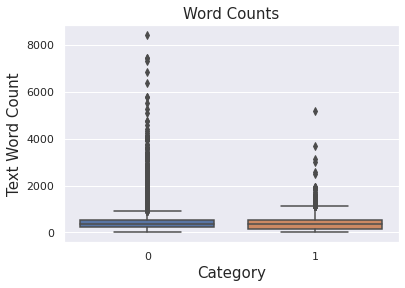

In [ ]:
sns.boxplot(x = 'category', y="Text Word Count", data = word_count_concat)
plt.title('Word Counts',fontsize = 15)
plt.xlabel('Category',fontsize = 15)
plt.ylabel('Text Word Count',fontsize = 15);

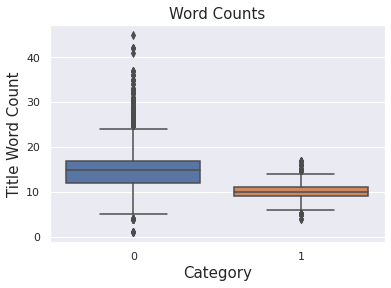

In [ ]:
sns.boxplot(x = 'category', y="Title Word Count", data = word_count_concat)
plt.title('Word Counts',fontsize = 15)
plt.xlabel('Category',fontsize = 15)
plt.ylabel('Title Word Count',fontsize = 15);

For both articles Title and Text, Fake news tends to have more word count and True news, as you would expect True news has a tendency to deliver more details about events the readers, however statistical analysese showed that in fact fake news had more words.

What could possibly demonstrate the bias of the dataset and training models? Could that be the use of junk words in the context? Or unnecessary repetitive words? I realized the news sources in the context such as "Reuters", "Washington", "21th Century" and more, can ensure the news are either True or False and therefore causes bias. That being said the current designed models cannot produce as good results when applying to a new dataset.

Future work such as in-depth analysis in the languages or use of words should be investigated to avoid the cause of skewed data.